# <center><strong> **Car Price Prediction** </strong></center>


###### **By Mohamed Jamyl**

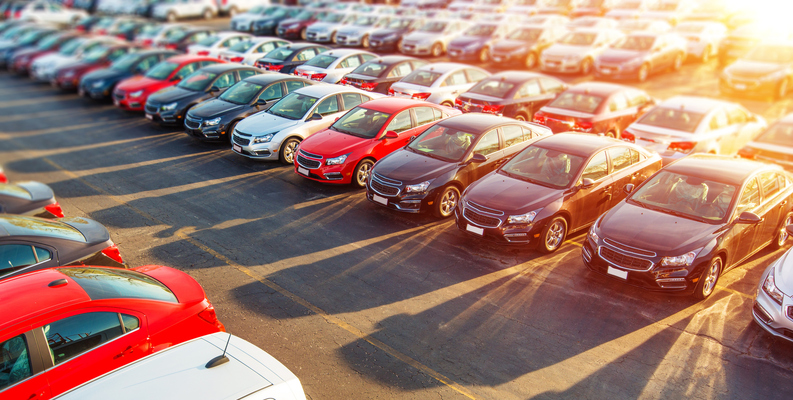

In [1]:
from IPython.display import Image
Image(filename='car.jpg')

## <center><strong> **Project Overview** </strong></center>

### With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available..

--------------------------------------------
--------------------------------------------

## **Import Libraries**

In [2]:
from pandas import read_csv, to_numeric, DataFrame, concat
from matplotlib.pyplot import show, hist, suptitle, subplots_adjust, tight_layout, plot, legend, subplots
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style 
from numpy import nan, log, inf
from seaborn import kdeplot, heatmap, pairplot, boxplot
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## **Exploratory Data Analysis (EDA)**
### **1. Initial Data Understanding**
- ##### **Data loading and Inspection**
- ##### **Data Types**
- ##### **Missing Values**
- ##### **Duplicates**

In [3]:
df = read_csv('car_price.csv')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [5]:
df.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
15583,45638146,157,640,FORD,Fusion,2013,Sedan,Yes,Hybrid,2,215965 km,4,Automatic,Front,4-May,Left wheel,Black,0
8700,44329013,39201,-,TOYOTA,Camry,2017,Sedan,Yes,Petrol,2.5,52000 km,4,Tiptronic,Front,4-May,Left wheel,Black,8
921,45784851,8467,-,FORD,Transit Connect,2003,Goods wagon,No,Diesel,1.8,230000 km,4,Manual,Front,2-Mar,Left wheel,White,4
18145,44992466,21639,586,LEXUS,CT 200h,2012,Hatchback,Yes,Hybrid,1.8,139000 km,4,Automatic,Front,4-May,Left wheel,White,6
10630,45647039,862,1481,BMW,X5,2017,Jeep,Yes,Petrol,3,0 km,6,Automatic,4x4,4-May,Left wheel,Black,12
3897,45813965,470,891,MERCEDES-BENZ,C 300,2016,Sedan,Yes,Petrol,2,81014 km,4,Automatic,Rear,4-May,Left wheel,White,12
3063,45754836,42337,917,AUDI,Q5 S-line,2013,Jeep,Yes,Petrol,3.0 Turbo,139259 km,6,Tiptronic,4x4,4-May,Left wheel,Black,12
3950,45209108,53314,1327,TOYOTA,Camry,2018,Sedan,Yes,Petrol,2.5,6800 km,6,Automatic,Front,4-May,Left wheel,Black,8
6289,45759631,9722,934,SUBARU,Forester,2015,Jeep,Yes,Petrol,2.5,93170 km,4,Automatic,4x4,4-May,Left wheel,Red,0
2967,45768960,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6,Automatic,4x4,4-May,Left wheel,Black,12


In [6]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,4-May,Left wheel,White,12


In [7]:
df.shape

(19237, 18)

In [8]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Engine volume':'Engine_volume',
                        'Fuel type':'Fuel_type',
                        'Leather interior':'Leather_interior',
                        'Gear box type':'Gear_box_type',
                        'Drive wheels':'Drive_wheels'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod_year         19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather_interior  19237 non-null  object
 8   Fuel_type         19237 non-null  object
 9   Engine_volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear_box_type     19237 non-null  object
 13  Drive_wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [11]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.duplicated().sum()

313

### 2. Basic Statistical Overview

- #### Summary Statistical : **describe()**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod_year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [14]:
df.select_dtypes(include='object').describe()

,Levy,Manufacturer,Model,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Gear_box_type,Drive_wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,4-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


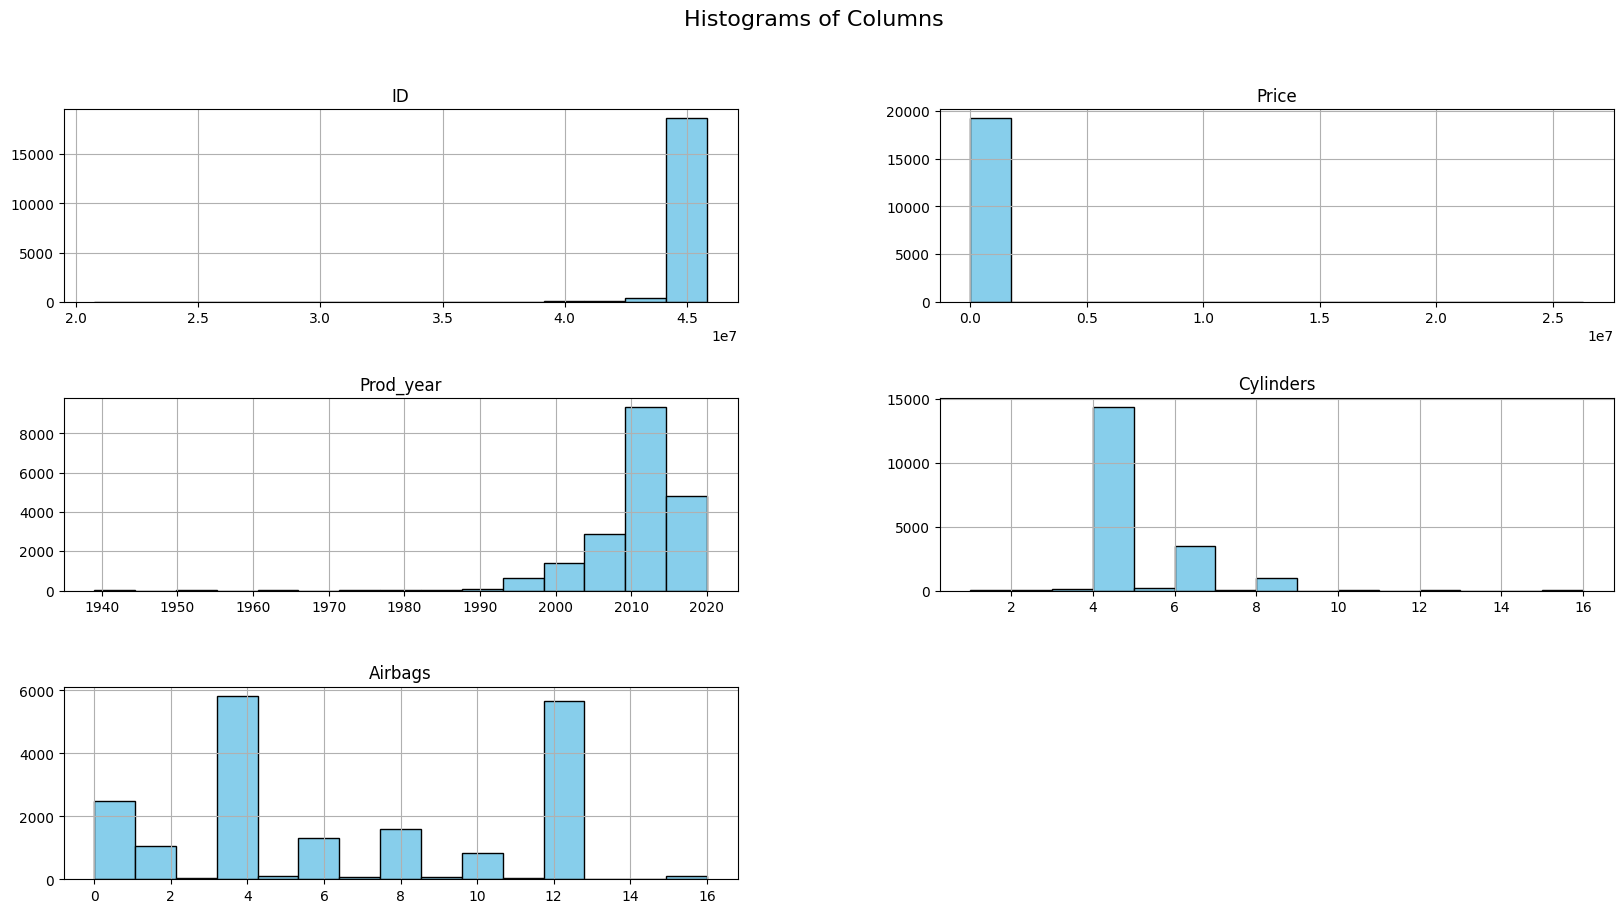

In [15]:
df.hist(bins=15, figsize=(20, 10), color='skyblue', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  
show()

- #### Summary Statistical : **Value_counts()**

In [16]:
top10=df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
Name: count, dtype: int64

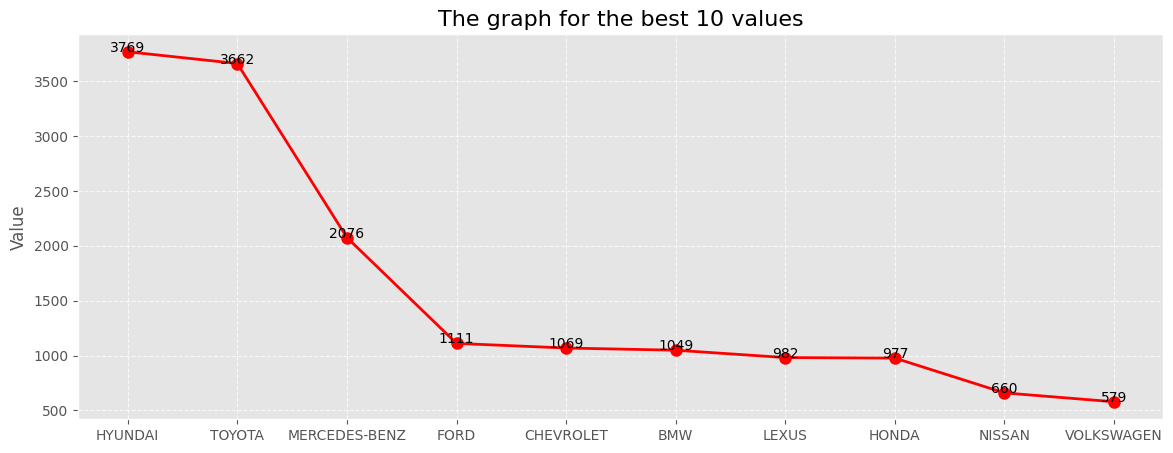

In [17]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top10, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 10 values', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top10):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()

In [18]:
top10MeanPrices=[df[df['Manufacturer']==i]['Price'].mean() for i in list(top10.index)]
top10MeanPrices

[22338.447864154947,
 14248.982250136538,
 18609.38294797688,
 15573.98199819982,
 14926.368568755846,
 20876.79218303146,
 19191.27698574338,
 14291.335721596724,
 10032.327272727272,
 11640.421416234887]

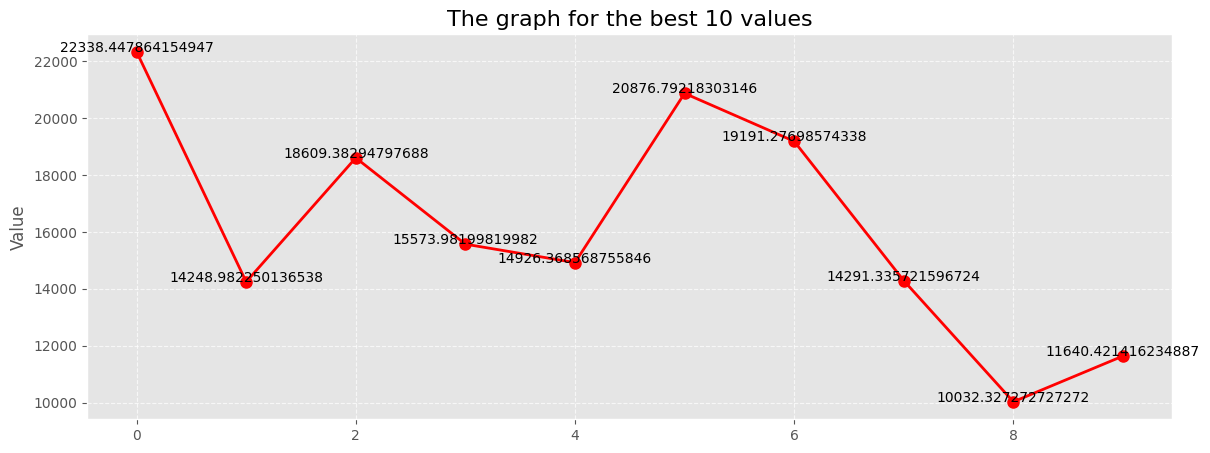

In [19]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top10MeanPrices, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 10 values', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top10MeanPrices):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()

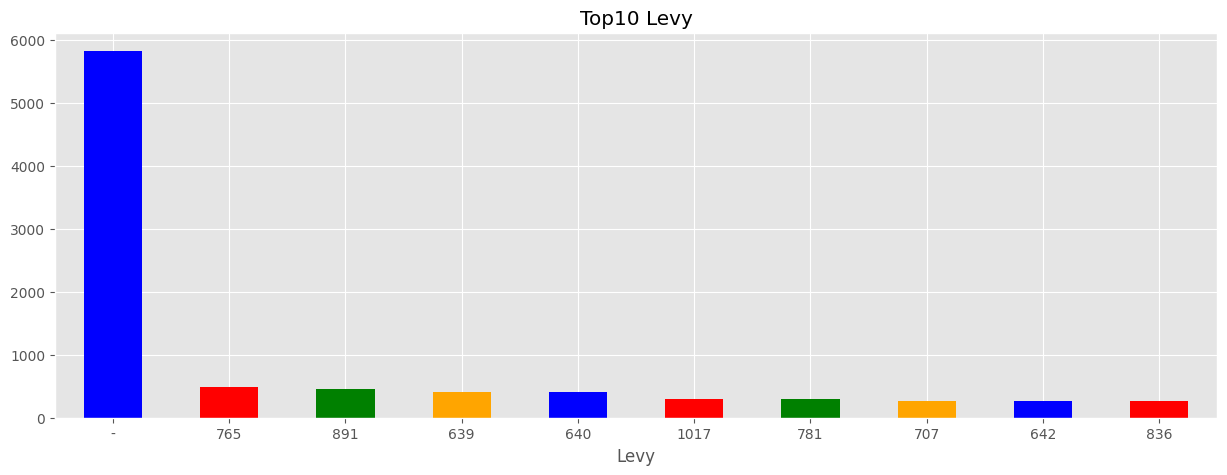

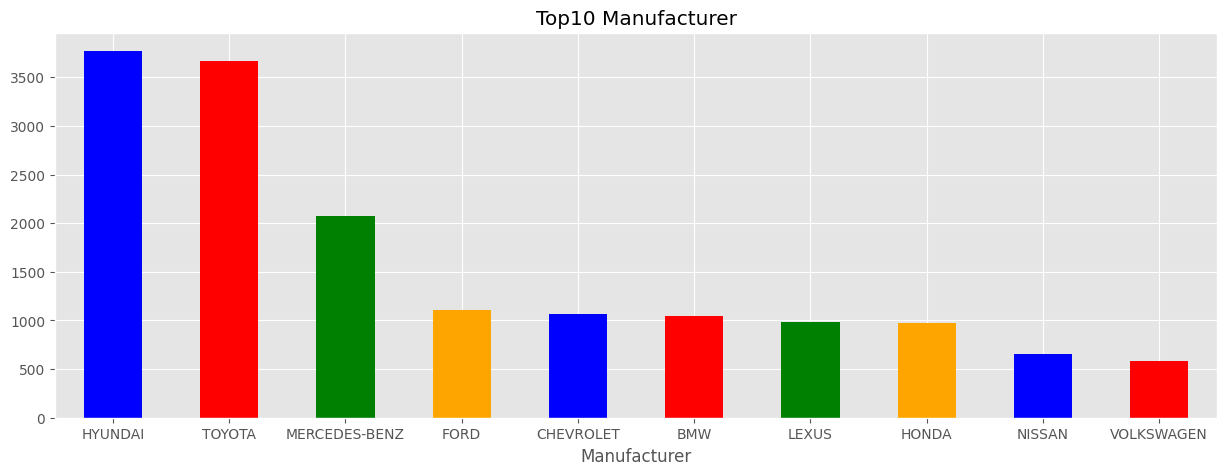

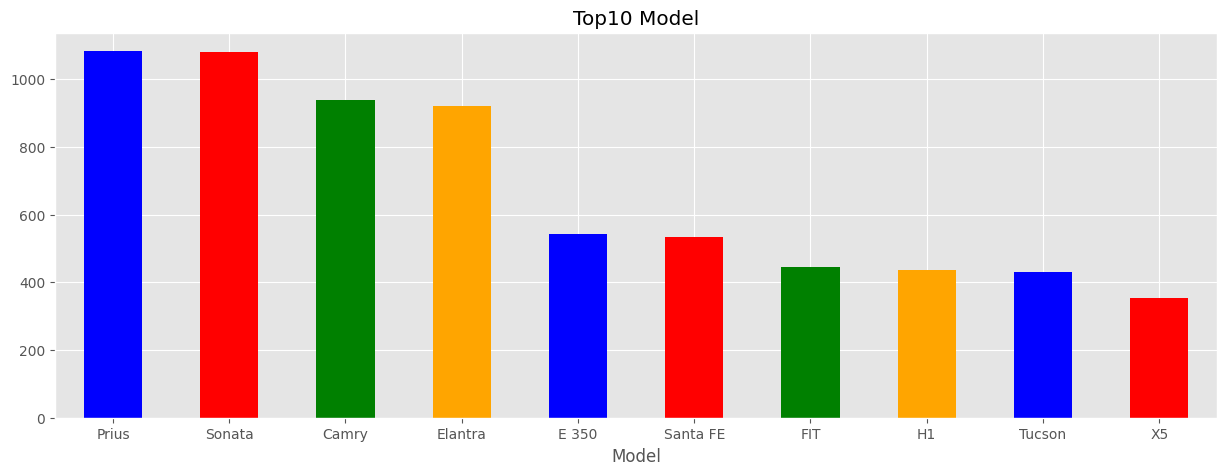

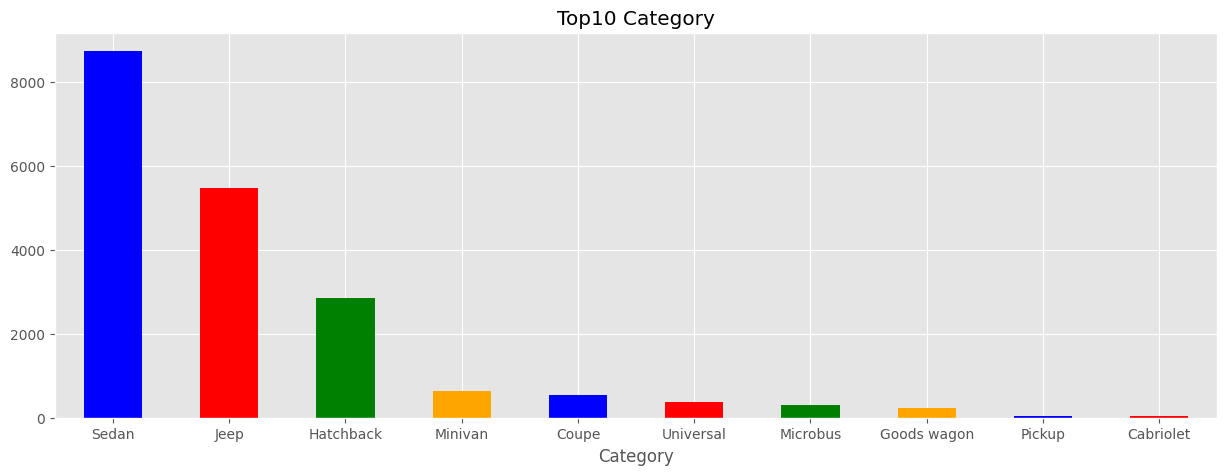

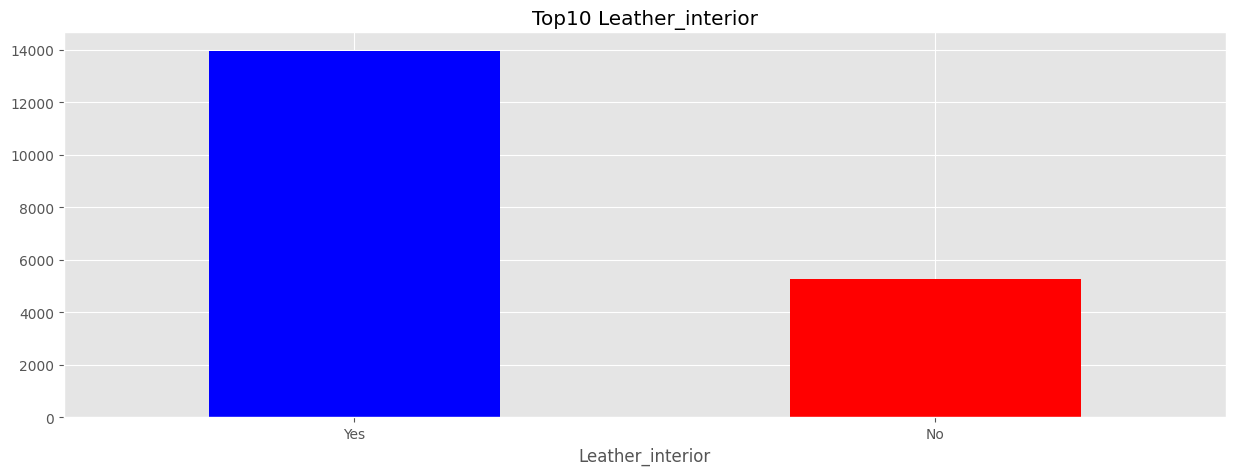

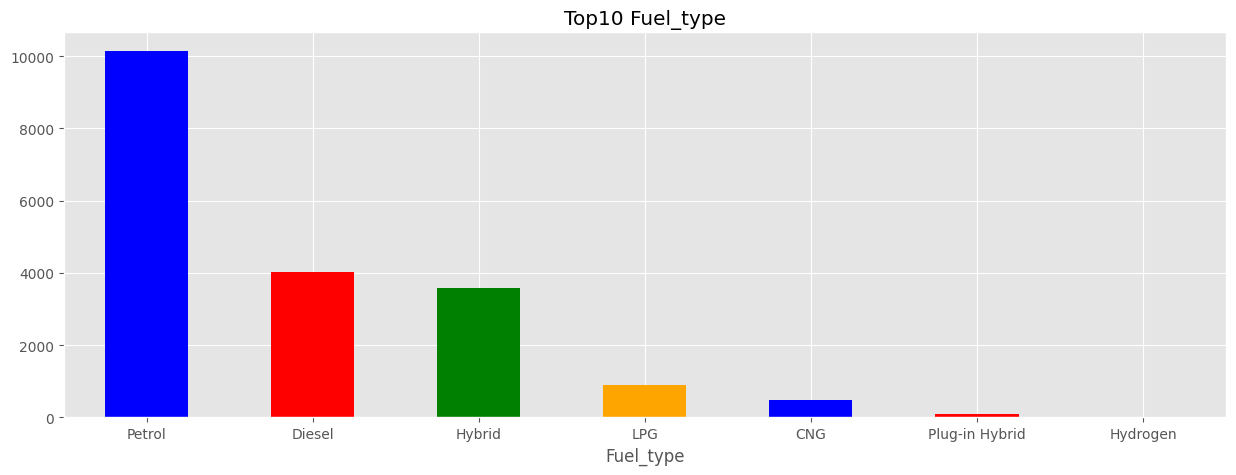

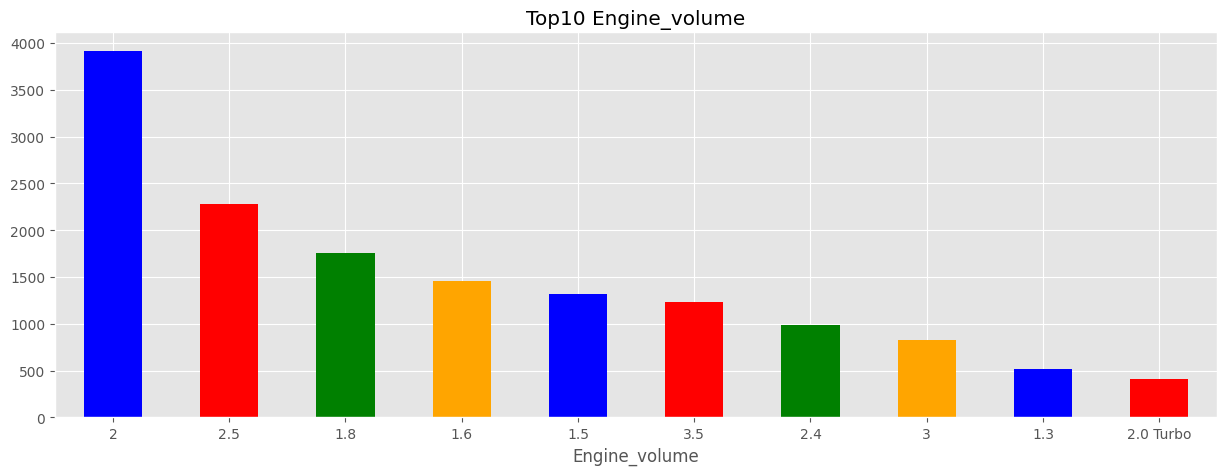

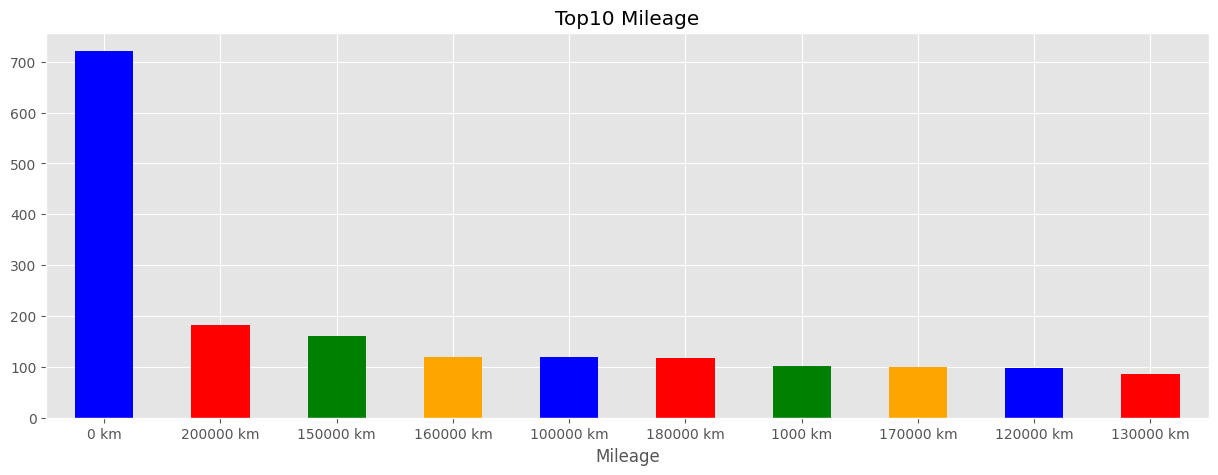

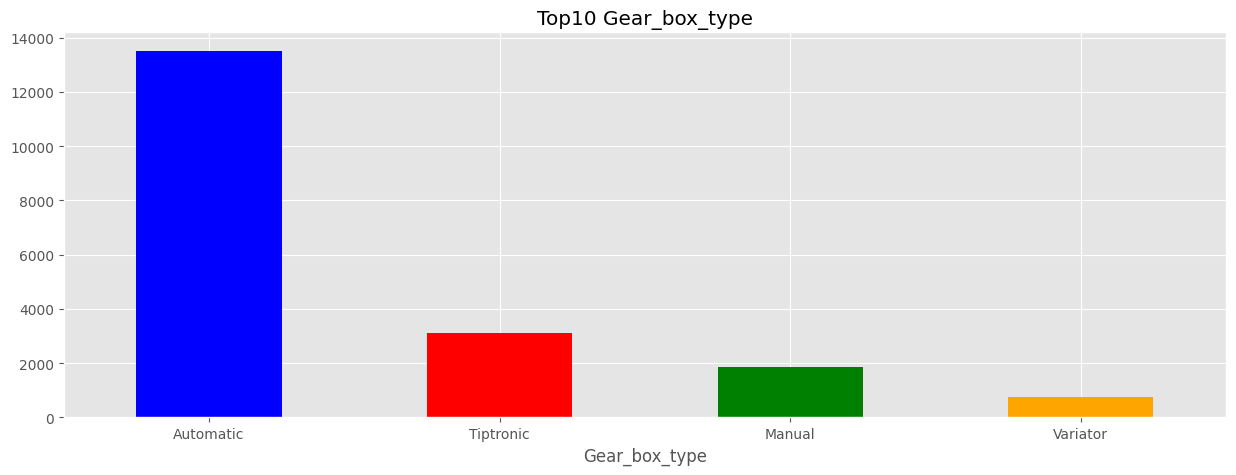

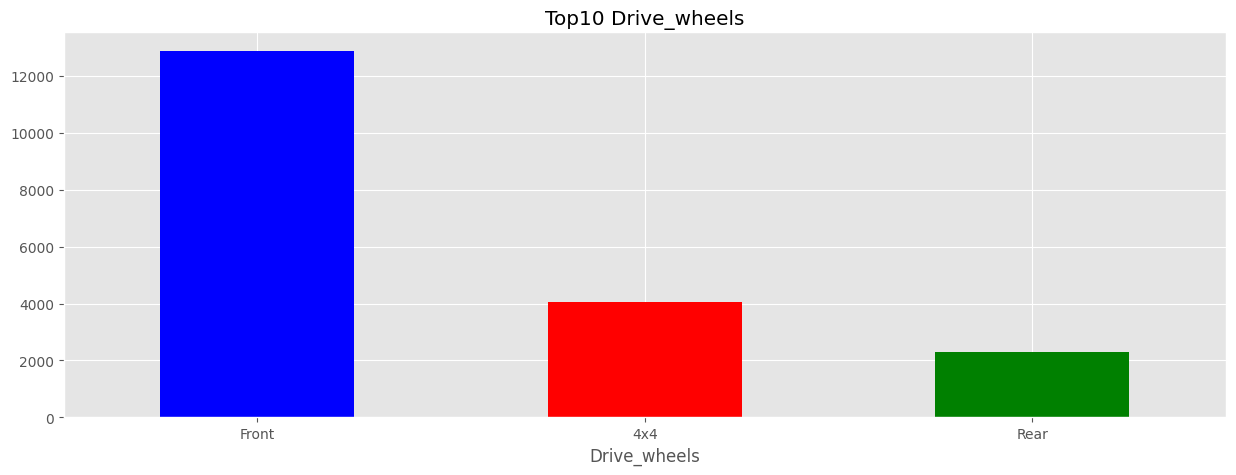

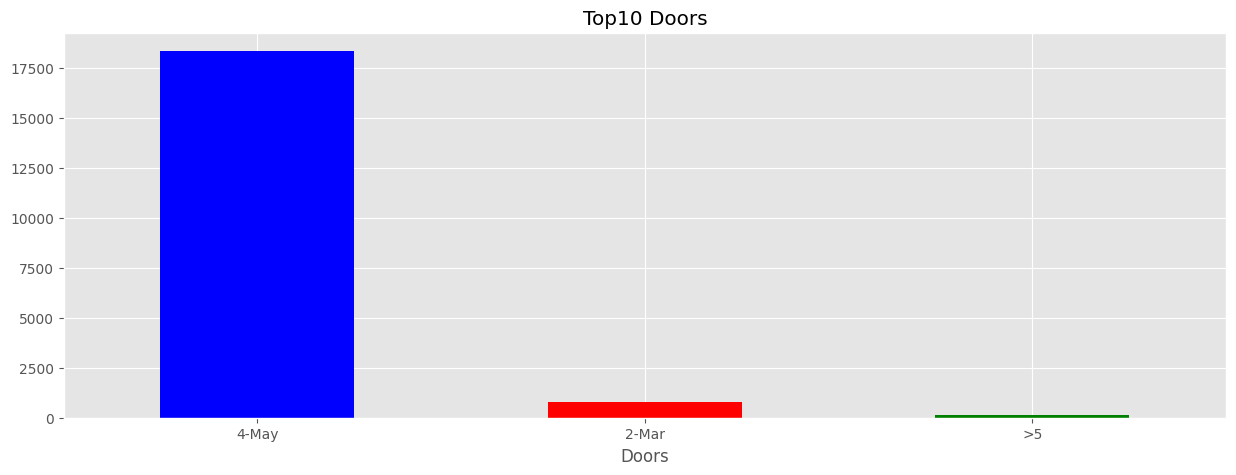

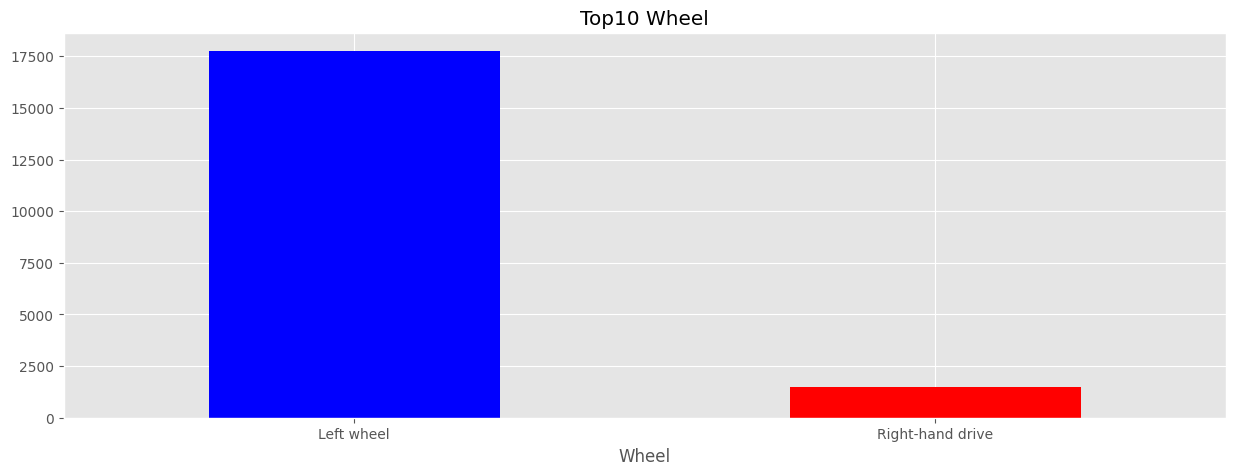

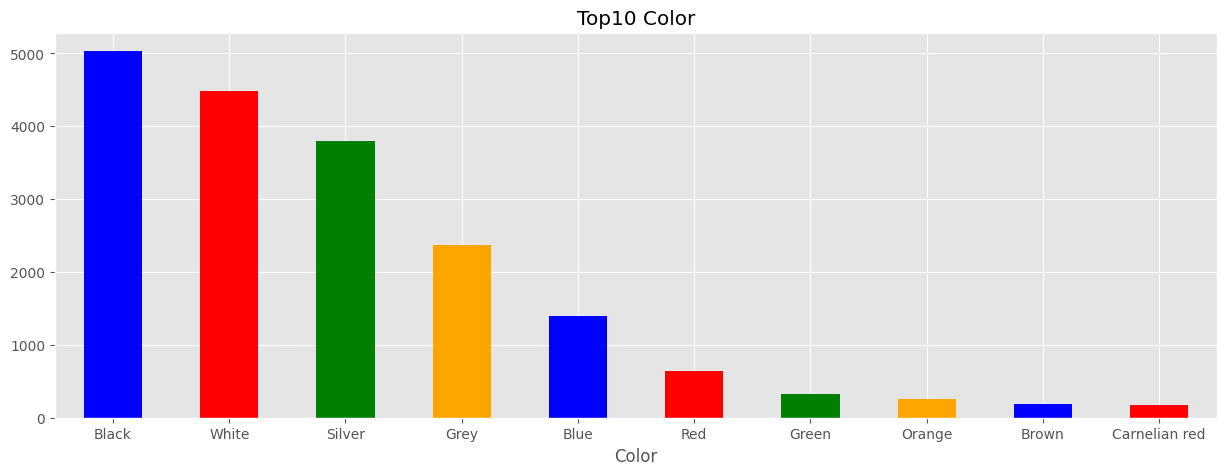

In [20]:
object_data = df.select_dtypes(include='object')
for col in object_data:
    style.use('ggplot')
    figure(figsize=(15,5))
    Top10=df[col].value_counts()[:10]
    colors=['blue','red','green','orange']
    Top10.plot(kind='bar',color=colors)
    xticks(rotation='horizontal' )
    title('Top10'+' '+col)
    show()

------------------------------
------------------------------

## Data Cleaning

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(18924, 18)

-------------------------------

In [23]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [24]:
len([i for i in df['Levy'].tolist() if not i.isnumeric()])

5709

In [25]:
# replace (-) by (0) in Levy column
df['Levy'].replace({'-':0},inplace=True)
df['Levy']=df['Levy'].astype(float)

C:\Users\RPC\AppData\Local\Temp\ipykernel_12744\272051335.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({'-':0},inplace=True)


In [26]:
df['Levy'].unique()

array([ 1399.,  1018.,     0.,   862.,   446.,   891.,   761.,   751.,
         394.,  1053.,  1055.,  1079.,   810.,  2386.,  1850.,   531.,
         586.,  1249.,  2455.,   583.,  1537.,  1288.,   915.,  1750.,
         707.,  1077.,  1486.,  1091.,   650.,   382.,  1436.,  1194.,
         503.,  1017.,  1104.,   639.,   629.,   919.,   781.,   530.,
         640.,   765.,   777.,   779.,   934.,   769.,   645.,  1185.,
        1324.,   830.,  1187.,  1111.,   760.,   642.,  1604.,  1095.,
         966.,   473.,  1138.,  1811.,   988.,   917.,  1156.,   687.,
       11714.,   836.,  1347.,  2866.,  1646.,   259.,   609.,   697.,
         585.,   475.,   690.,   308.,  1823.,  1361.,  1273.,   924.,
         584.,  2078.,   831.,  1172.,   893.,  1872.,  1885.,  1266.,
         447.,  2148.,  1730.,   730.,   289.,   502.,   333.,  1325.,
         247.,   879.,  1342.,  1327.,  1598.,  1514.,  1058.,   738.,
        1935.,   481.,  1522.,  1282.,   456.,   880.,   900.,   798.,
      

In [27]:
df['Levy'].mean()

632.8864933417882

In [28]:
df['Levy'].replace({0:nan},inplace=True)

m=df['Levy'].mean()
df['Levy'].fillna(m,inplace=True)

C:\Users\RPC\AppData\Local\Temp\ipykernel_12744\1111466452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].replace({0:nan},inplace=True)
C:\Users\RPC\AppData\Local\Temp\ipykernel_12744\1111466452.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [29]:
df['Levy'].value_counts()

Levy
906.299205     5709
765.000000      482
891.000000      453
639.000000      403
640.000000      398
               ... 
3156.000000       1
2908.000000       1
1279.000000       1
1719.000000       1
1901.000000       1
Name: count, Length: 559, dtype: int64

--------------------------------

In [30]:
df['Engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [34]:
len([i for i in df['Engine_volume'].tolist() if 'Turbo' in i])

1892

In [ ]:
# replace (Turbo) by ('') in Engine volume column
df['Engine_volume']=df['Engine_volume'].str.replace('Turbo','')
df['Engine_volume'] = to_numeric(df['Engine_volume'])

In [ ]:
df['Engine_volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

--------------------------

In [ ]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [35]:
len([i for i in df['Mileage'].tolist() if 'km' in i])

18924

In [ ]:
# replace (km) by ('') in Mileage column
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=to_numeric(df['Mileage'])

In [ ]:
df['Mileage'].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923], dtype=int64)

------------------------------------

In [ ]:
df=df.drop(['ID','Doors'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod_year         18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather_interior  18924 non-null  object 
 7   Fuel_type         18924 non-null  object 
 8   Engine_volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  int64  
 11  Gear_box_type     18924 non-null  object 
 12  Drive_wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usa

In [ ]:
df['Cylinders'].sort_values(ascending=False) #87  11714

12550    16
16487    16
456      16
1917     16
6863     16
         ..
13850     1
4599      1
8181      1
9980      1
13104     1
Name: Cylinders, Length: 18924, dtype: int64

------------------------------
------------------------------

## **Distribution of Variables**

- #### **Numerical Features (KDE)**

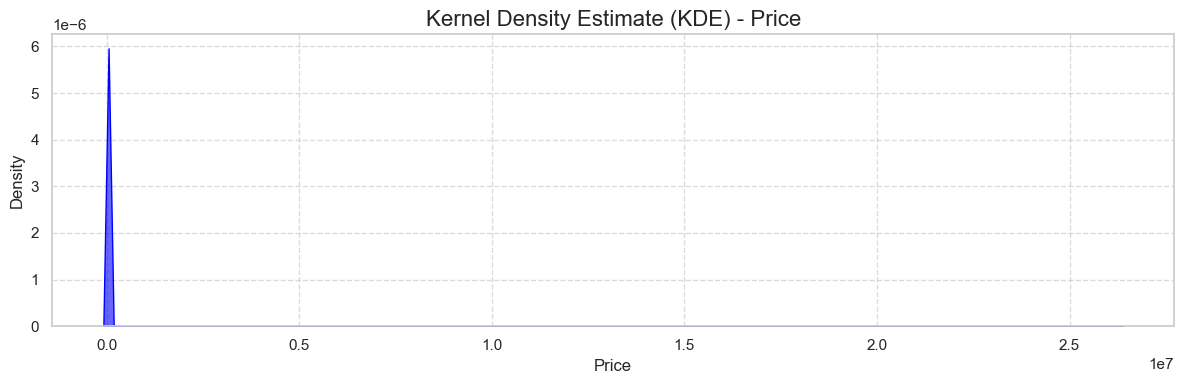

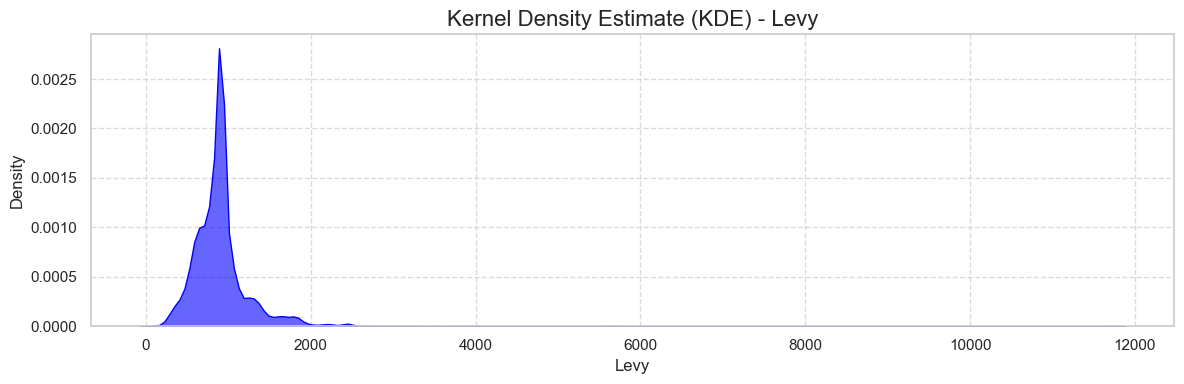

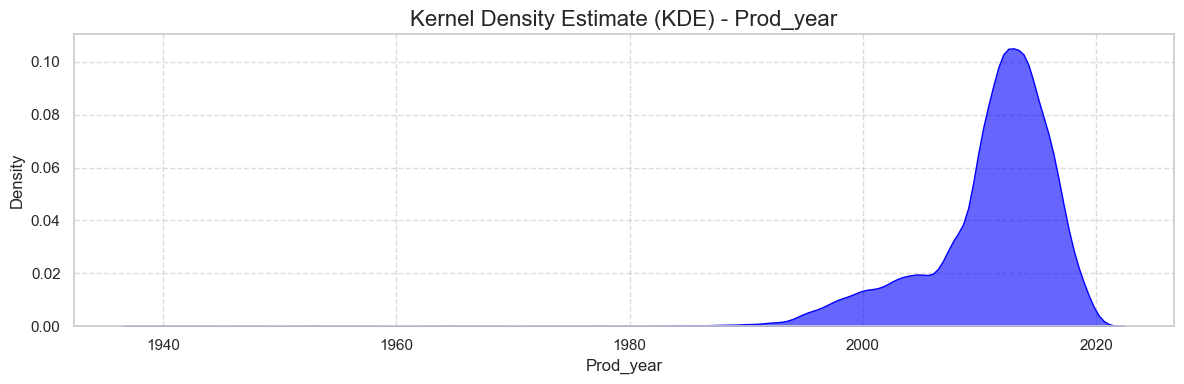

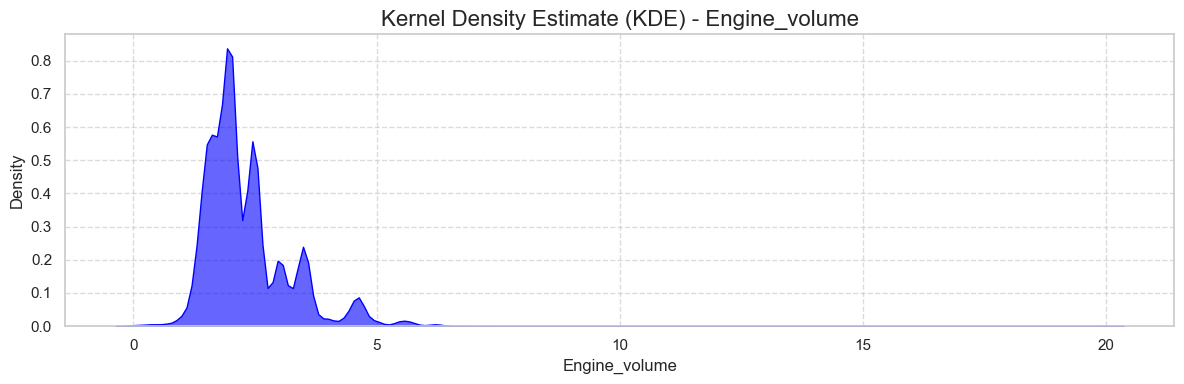

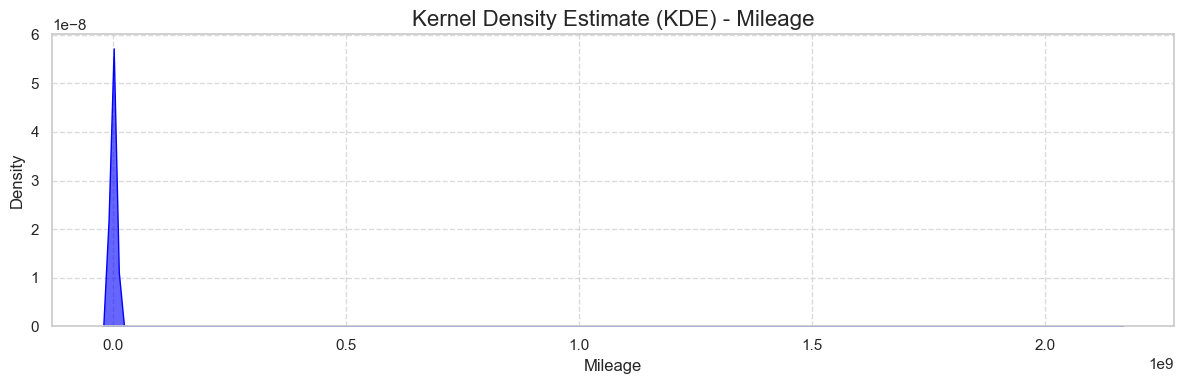

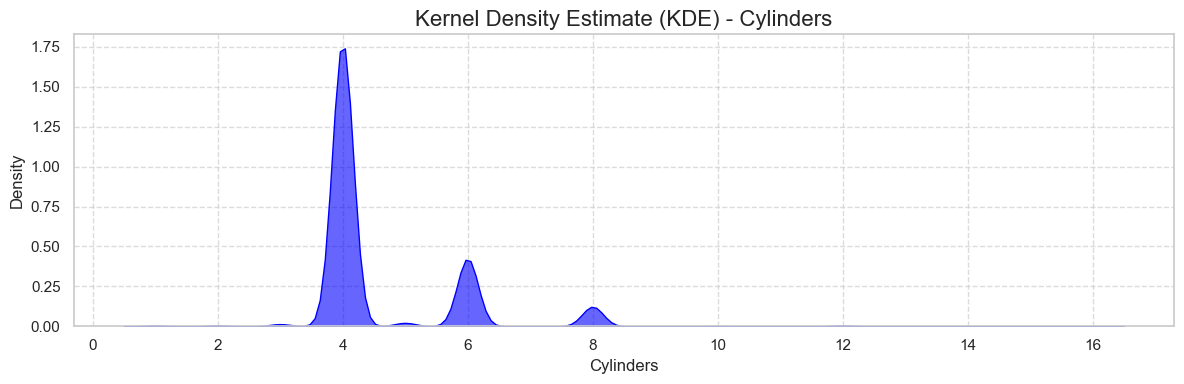

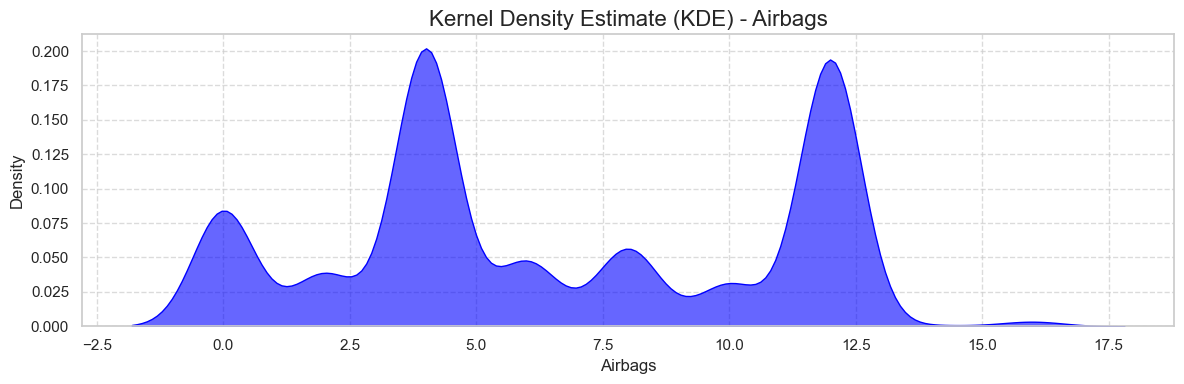

In [ ]:
set(style="whitegrid")
for col in df.select_dtypes('number').columns:
    figure(figsize=(12, 4))  
    kdeplot(df[col], fill=True, color='blue', alpha=0.6)  
    title(f'Kernel Density Estimate (KDE) - {col}', fontsize=16)  
    xlabel(col, fontsize=12)  
    ylabel('Density', fontsize=12) 
    grid(True, linestyle='--', alpha=0.7)  
    tight_layout()  
    show()

-----------------------

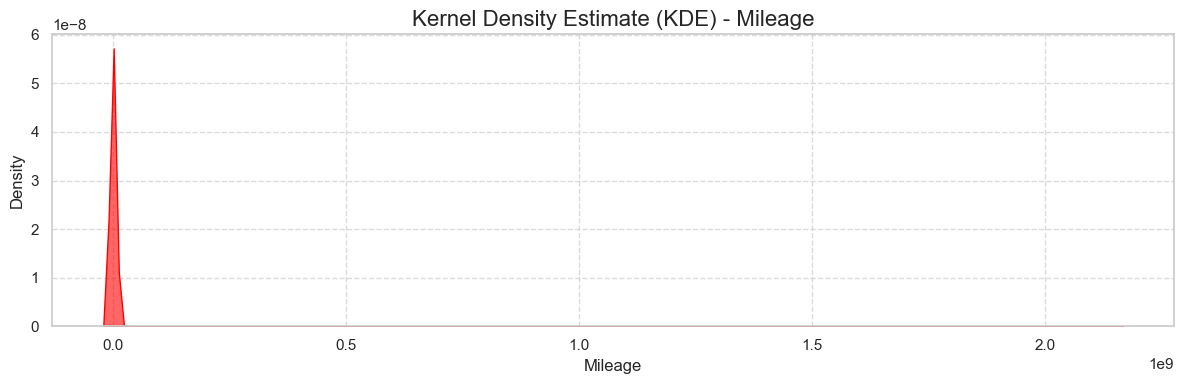

In [ ]:
Mileage = df['Mileage'].name
set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(df['Mileage'], fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {Mileage}', fontsize=16)  
xlabel('Mileage', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


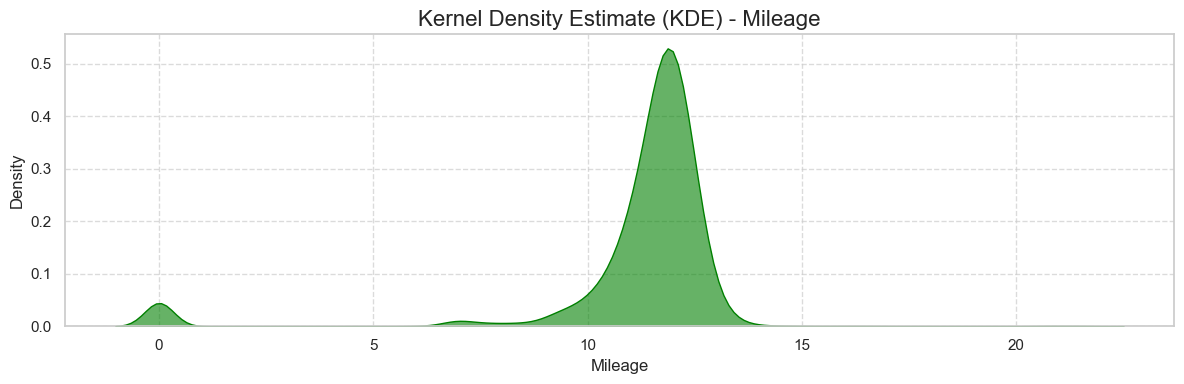

In [ ]:
# log transformation
set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(log(df['Mileage']).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {Mileage}', fontsize=16)  
xlabel('Mileage', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

-----------------------------

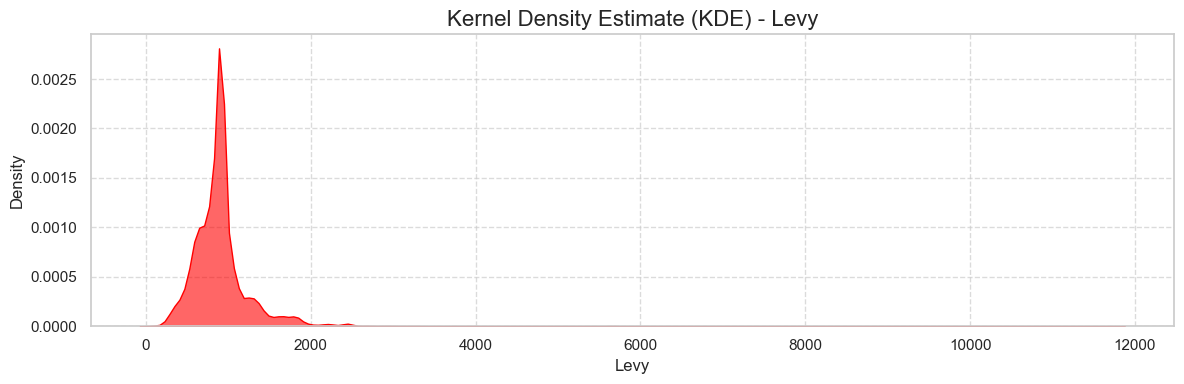

In [ ]:
levy = df['Levy'].name

set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(df['Levy'], fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {levy}', fontsize=16)  
xlabel('Levy', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

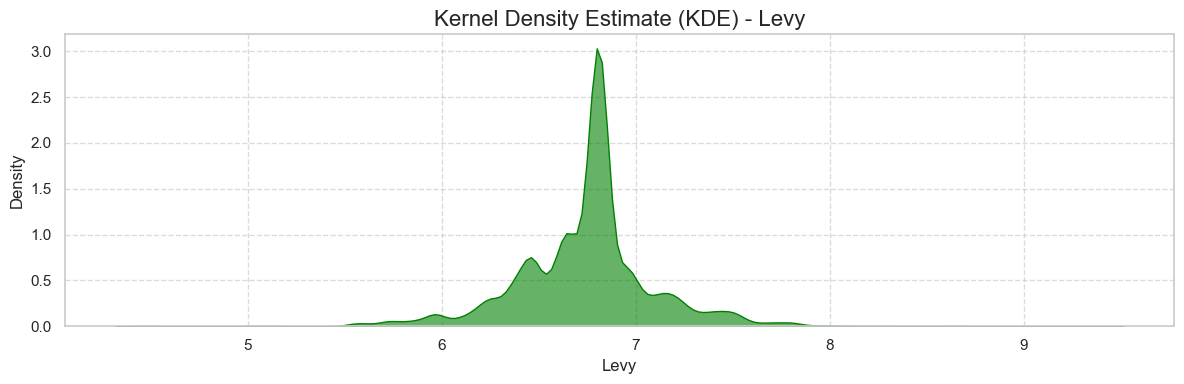

In [ ]:
# log transformation

set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(log(df['Levy']).replace(inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {levy}', fontsize=16)  
xlabel('Levy', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

----------------------------------

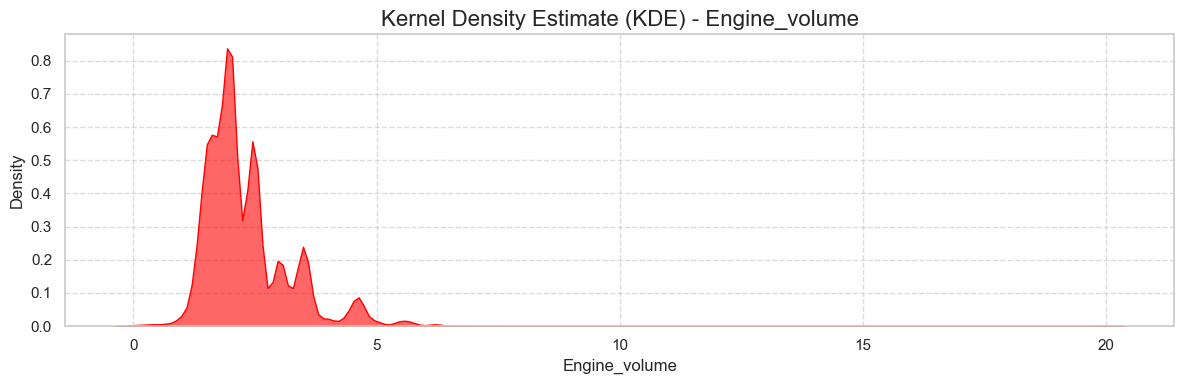

In [ ]:
Engine_volume = df['Engine_volume'].name

set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(df['Engine_volume'], fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {Engine_volume}', fontsize=16)  
xlabel('Engine_volume', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

C:\Users\RPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


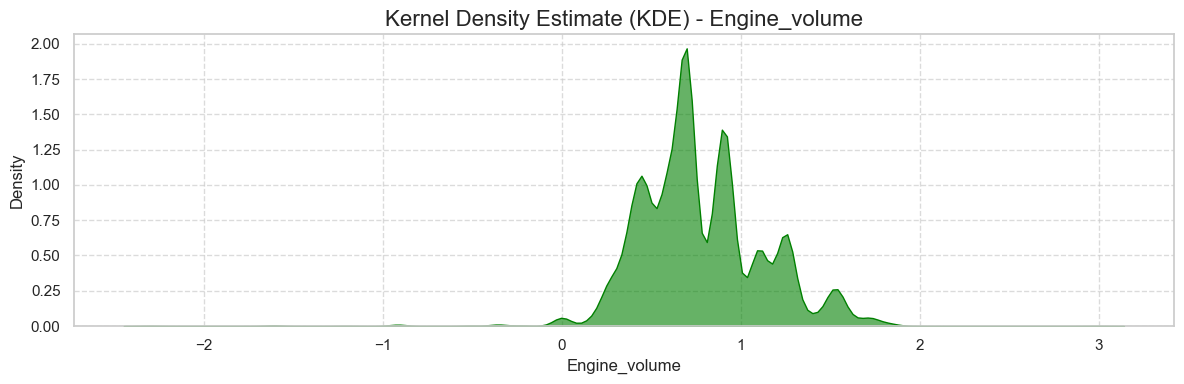

In [ ]:
# log transformation

set(style="whitegrid")
figure(figsize=(12, 4))  
kdeplot(log(df['Engine_volume']).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - {Engine_volume}', fontsize=16)  
xlabel('Engine_volume', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

------------------------------
------------------------------

### **Correlation**

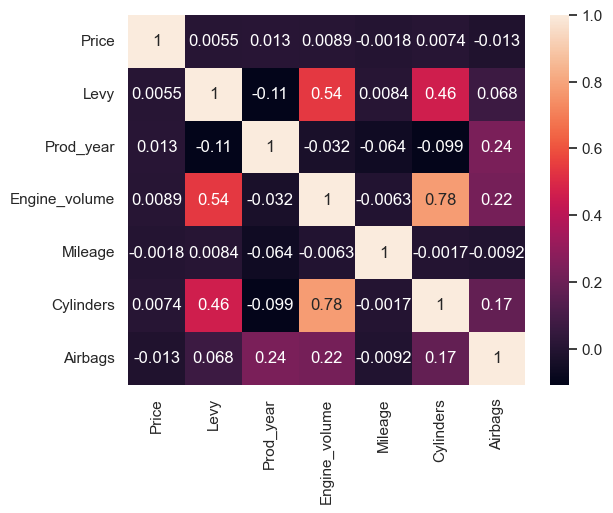

In [ ]:
heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
show()

### **Feature Interactions**

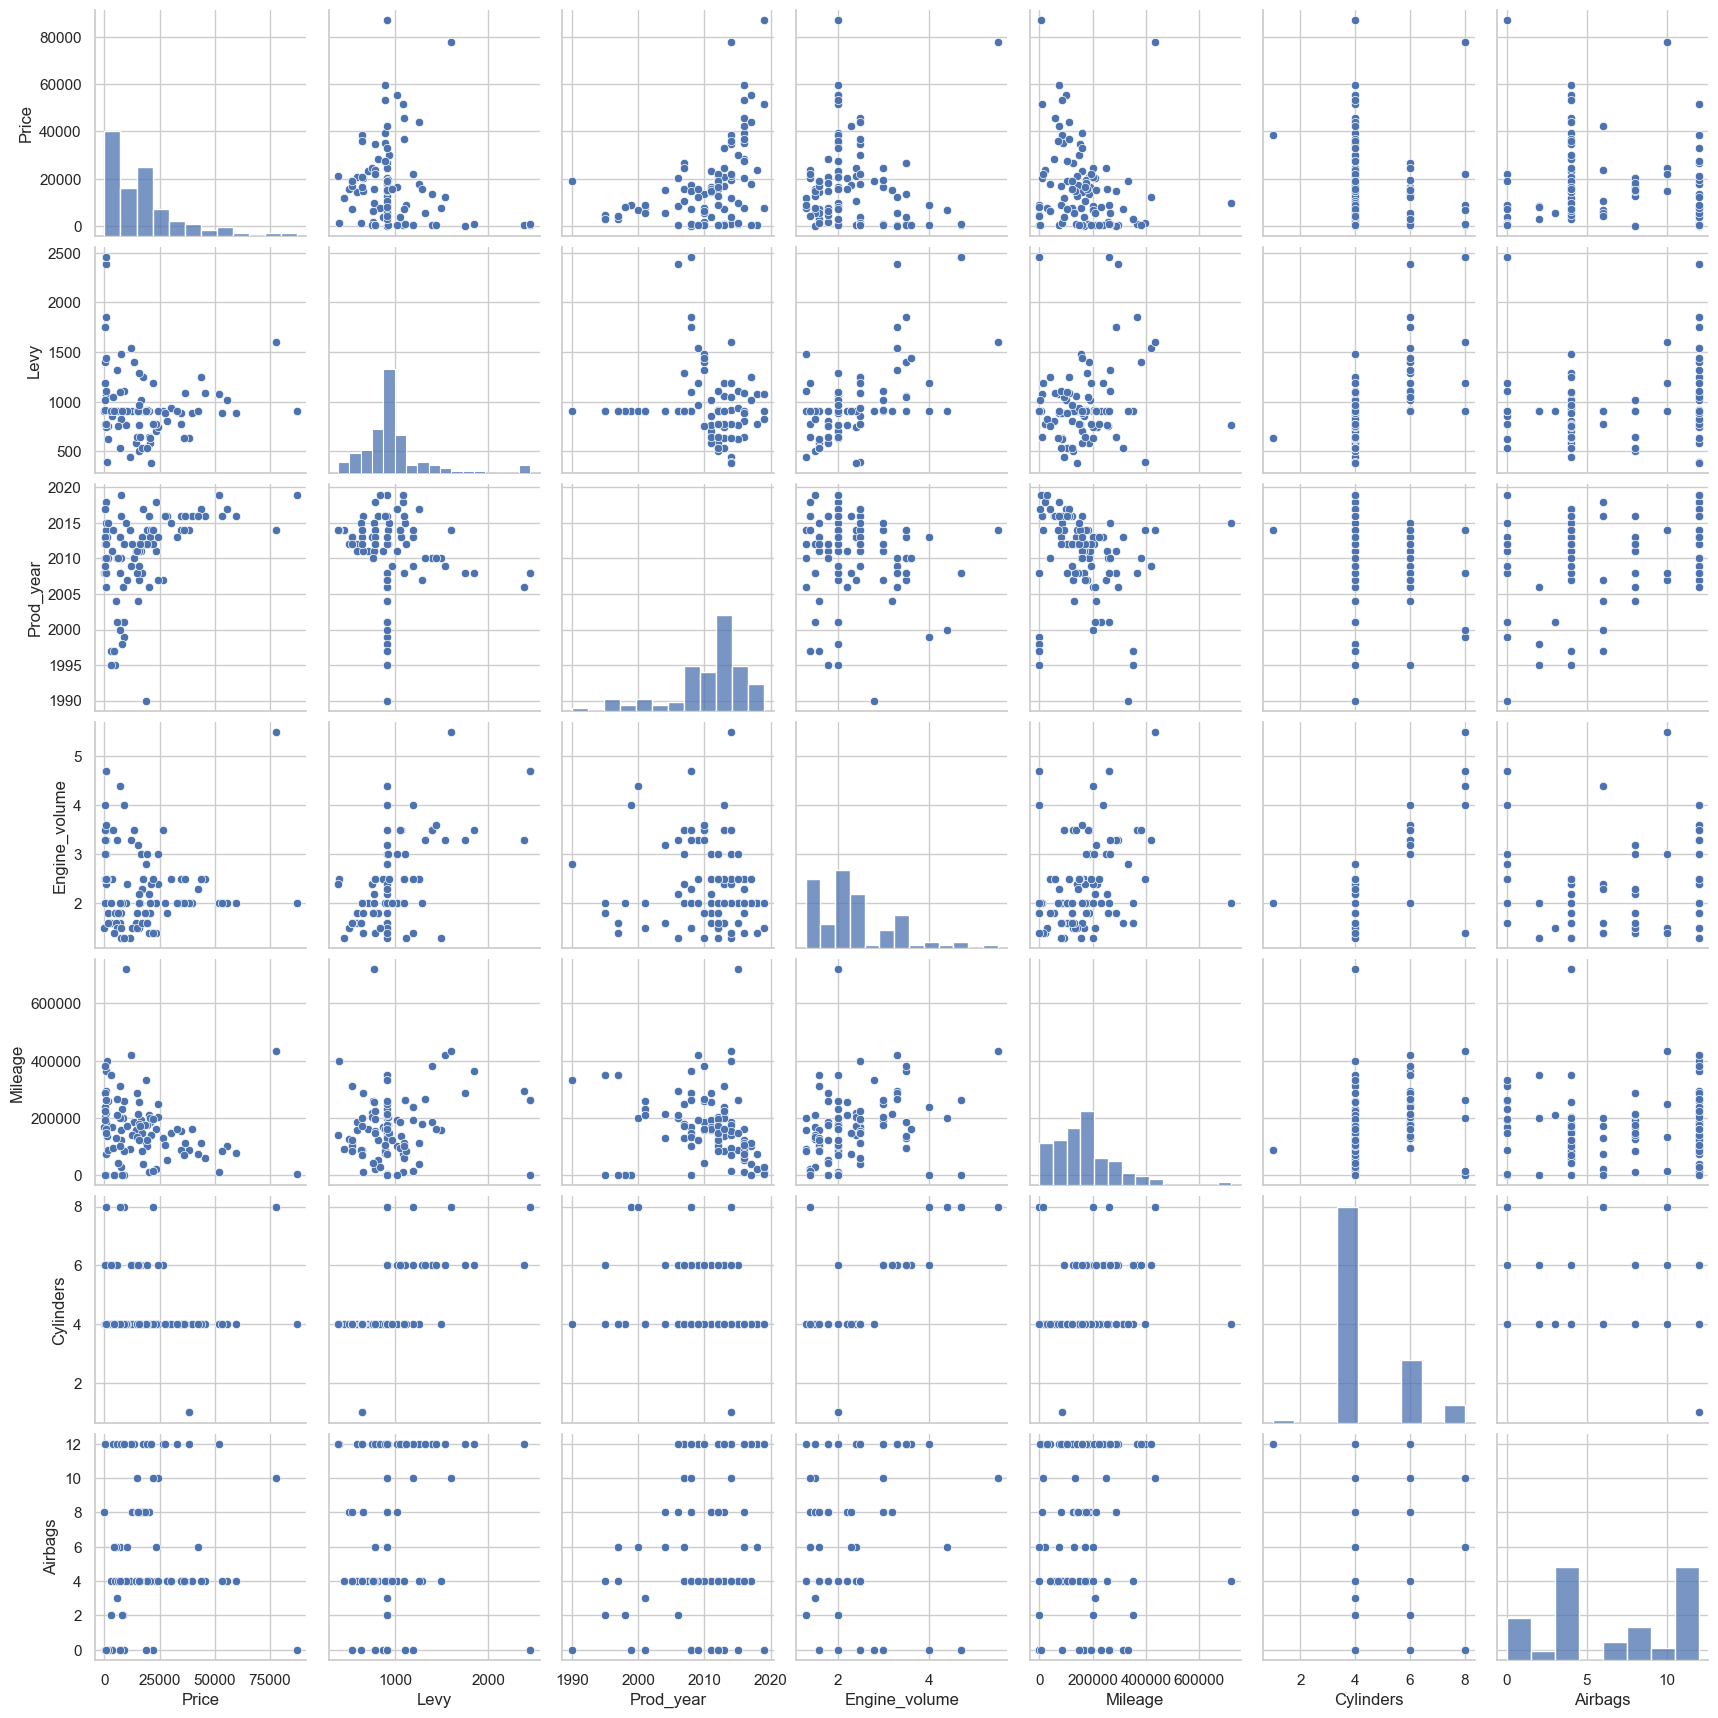

In [ ]:
pairplot(df[:100])
show()

------------------------------
------------------------------

## **Detect Outliers**

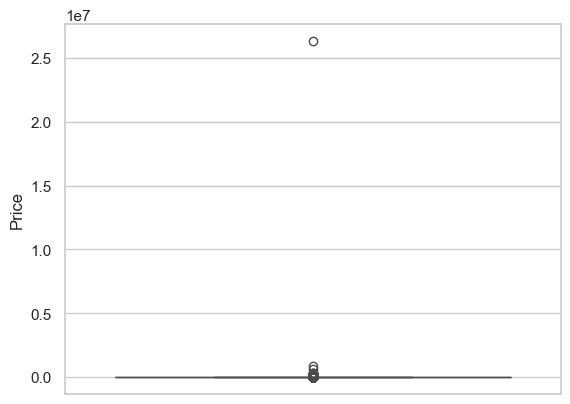

In [ ]:
boxplot(df['Price'])
show()

In [ ]:
df[df['Price']> 5e5]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
1225,627220,906.299205,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8,Tiptronic,4x4,Left wheel,Black,12
8541,872946,2067.000000,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8,Tiptronic,4x4,Left wheel,Black,0
16983,26307500,906.299205,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4,Manual,Front,Left wheel,Blue,0


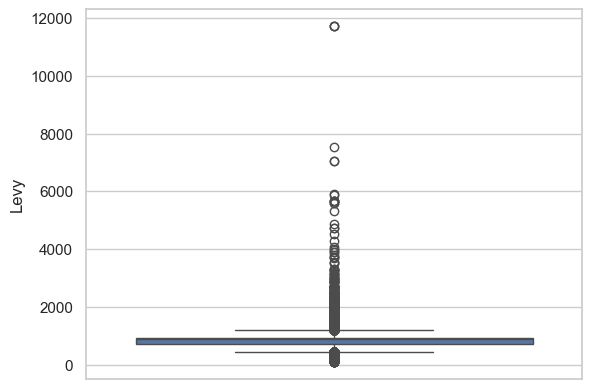

In [ ]:
boxplot(df['Levy'])
show()

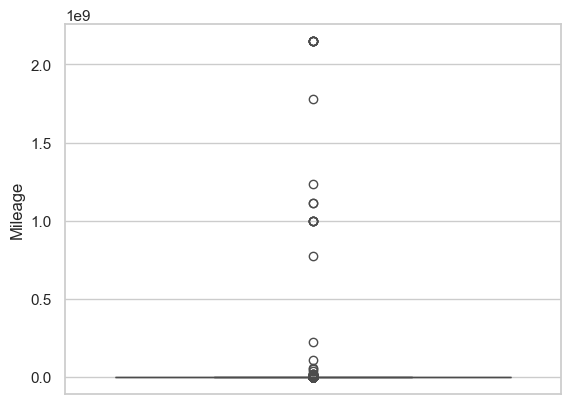

In [ ]:
boxplot(df['Mileage'])
show()

In [ ]:
numerical_data=df[['Price','Levy','Engine_volume','Mileage','Cylinders','Airbags']]
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]

Total of outliers in Price are   :   1055--5.57%
Total of outliers in Levy are   :   3103--16.4%
Total of outliers in Engine_volume are   :   1358--7.18%
Total of outliers in Mileage are   :   635--3.36%
Total of outliers in Cylinders are   :   4765--25.18%
Total of outliers in Airbags are   :   0--0.0%


In [ ]:
# def outliers(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3-Q1

#     lower_bound= Q1-1.5 * IQR
#     upper_bound= Q1+1.5 * IQR

#     df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df_no_outliers

# df= outliers(df,'Price')
# df= outliers(df,'Mileage')
# df= outliers(df,'Levy')
# df= outliers(df,'Engine_volume')
# df= outliers(df,'Cylinders')
# df= outliers(df,'Airbags')

In [ ]:
df.shape

(11520, 16)

C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4107607252.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Price'])


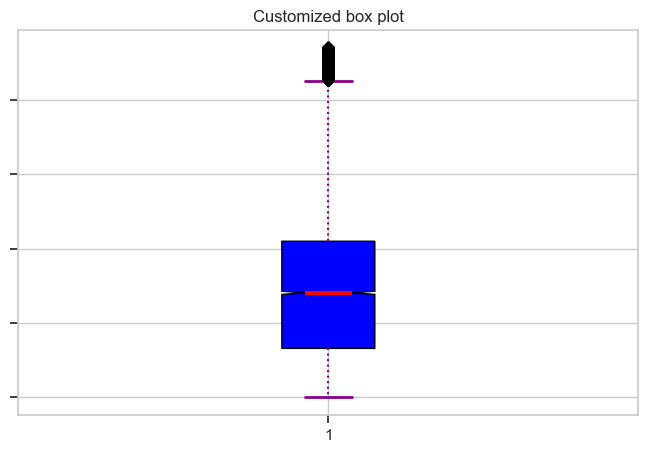

In [ ]:
# Creating dataset
data = df['Price']

fig = figure(figsize =(8, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
    
# x-axis labels
ax.set_yticklabels(['Price'])

# Adding title 
title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
show()

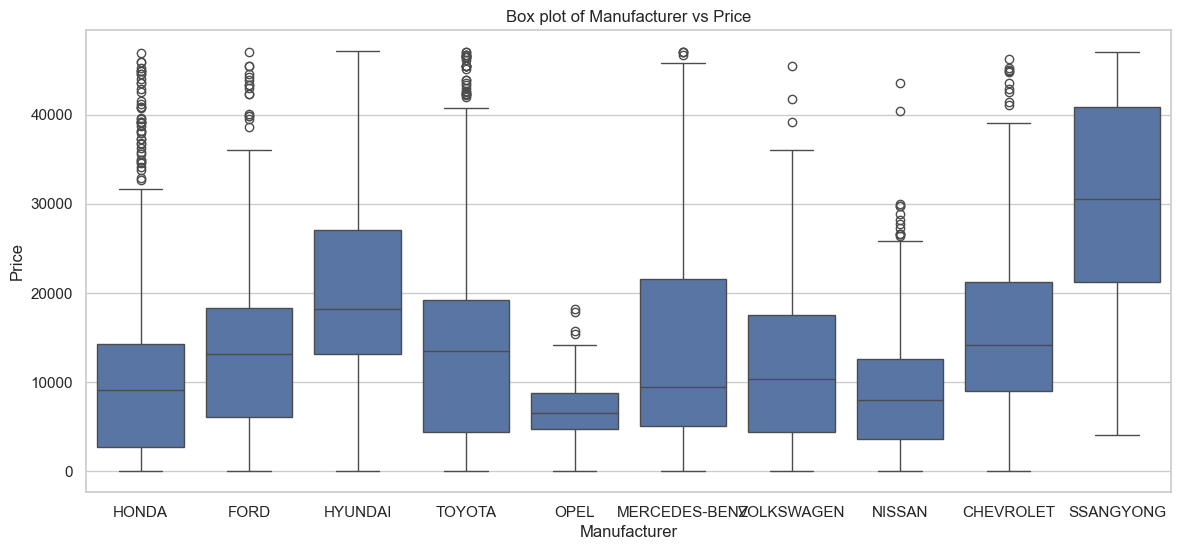

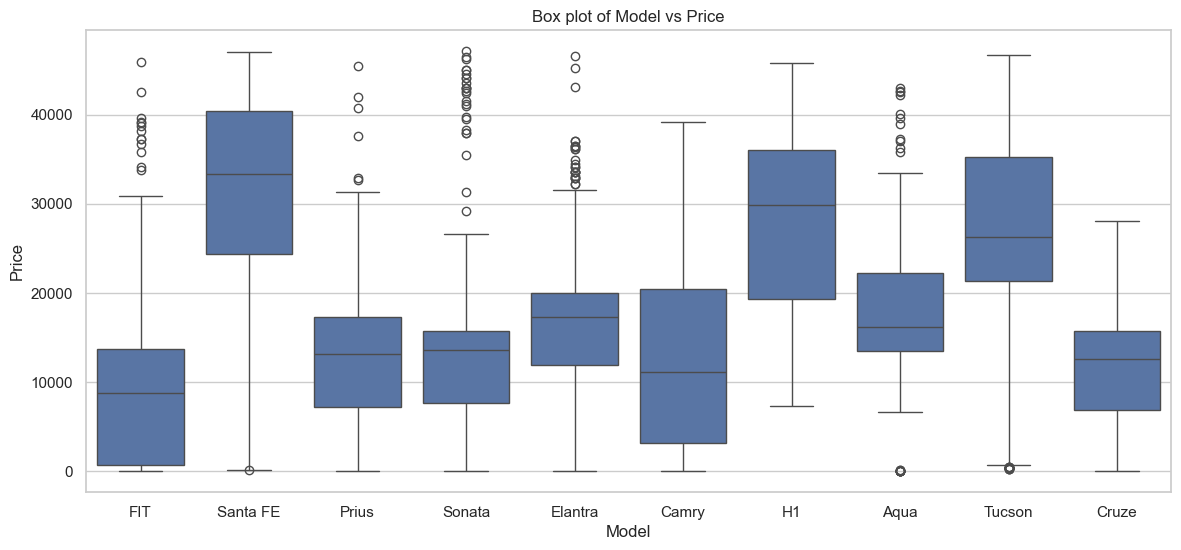

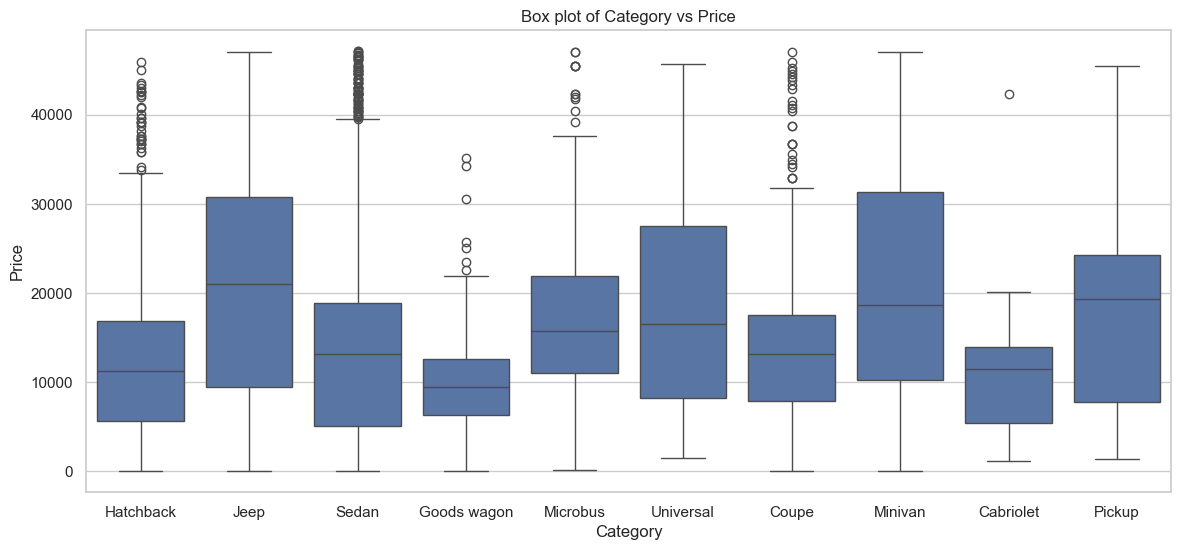

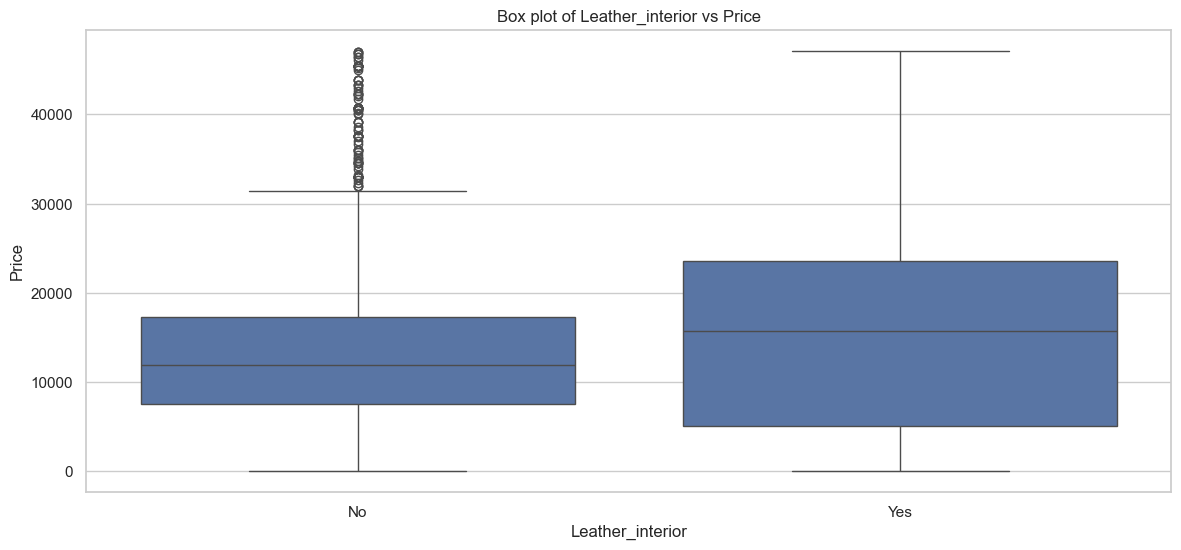

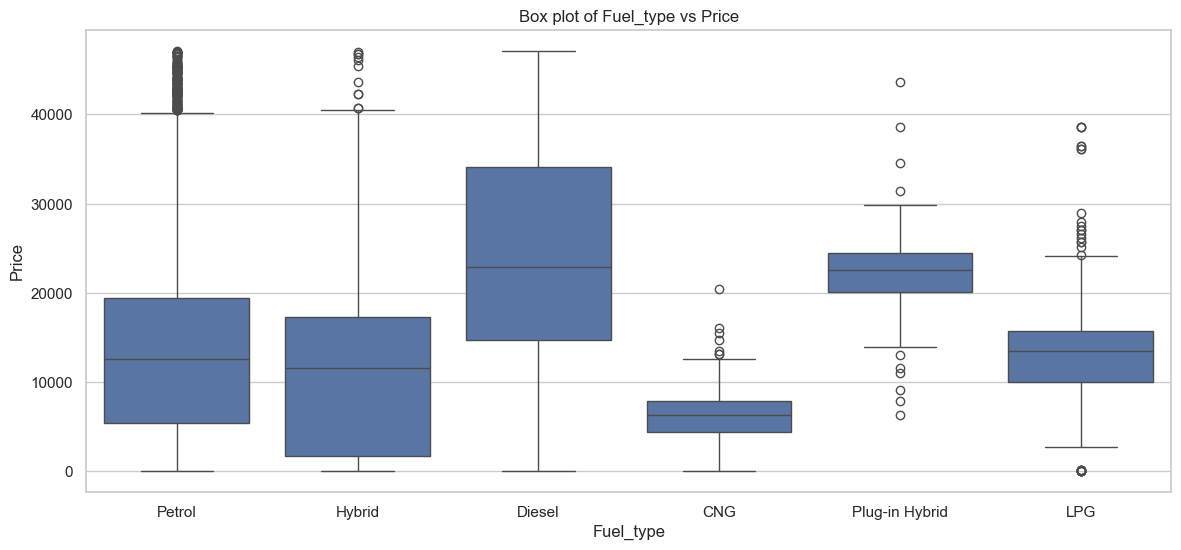

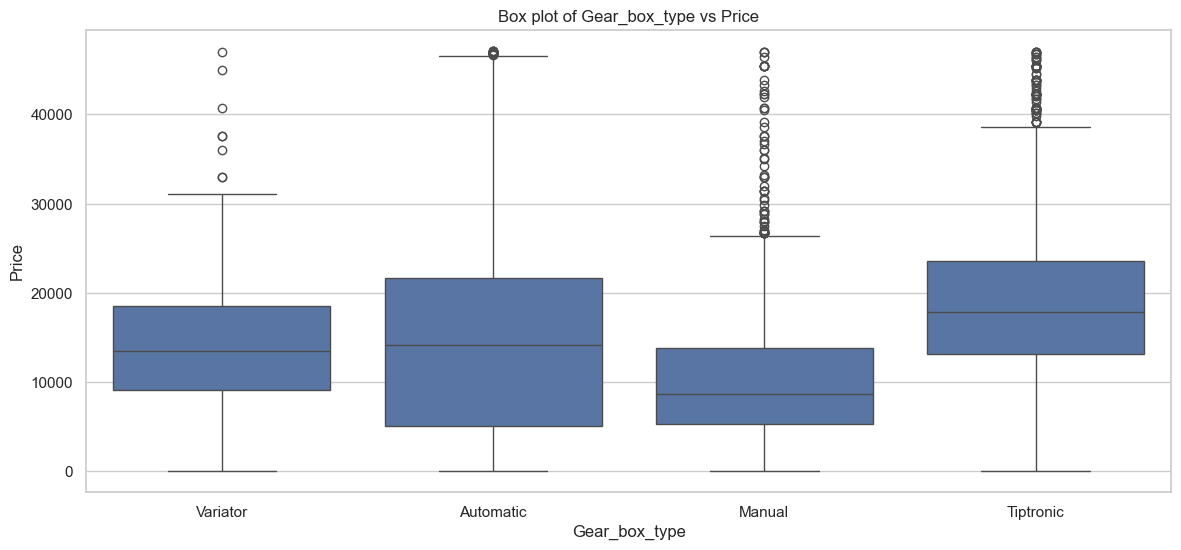

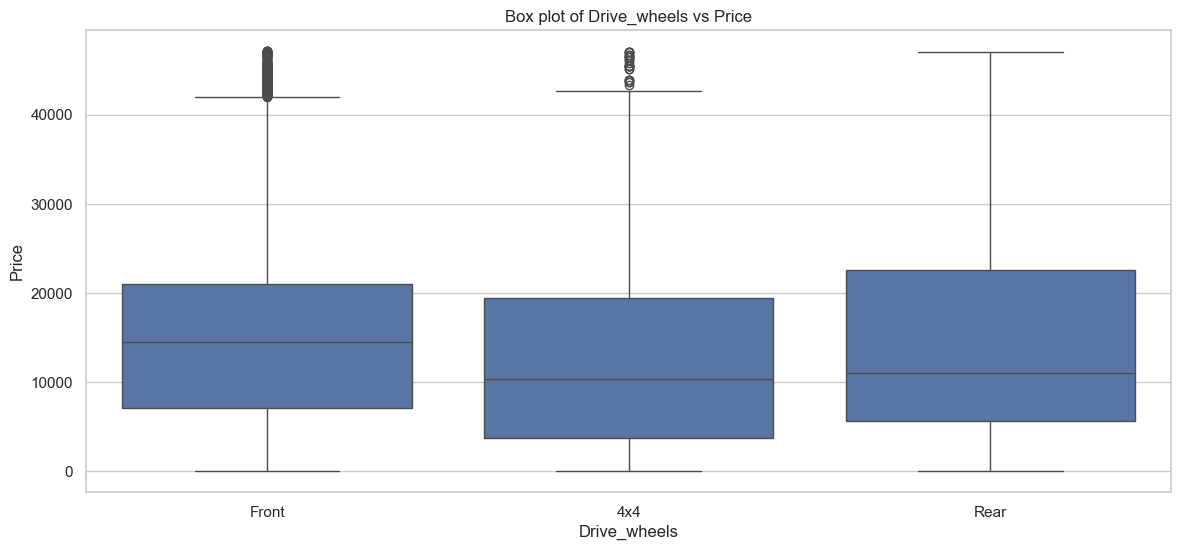

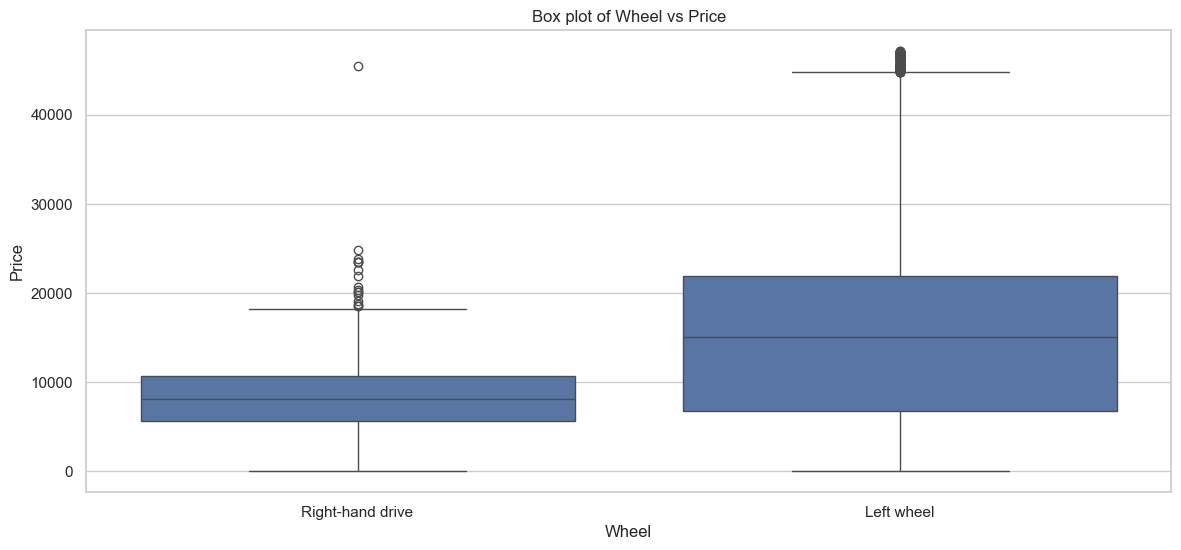

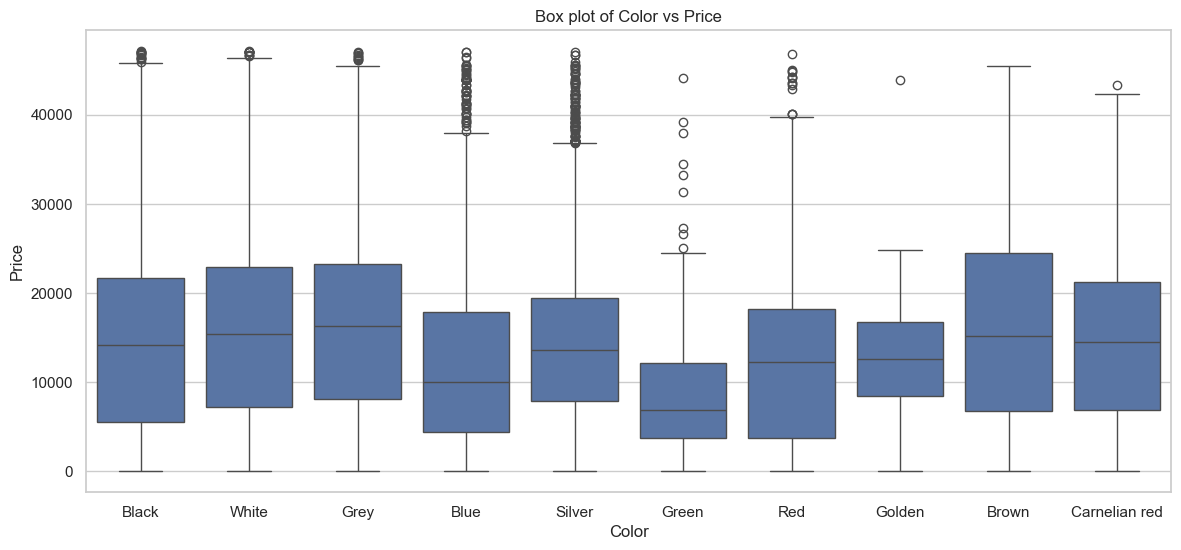

In [ ]:
# Target Variable Analysis
# Relationship with Predictors (scatter plots, box Plots against the target)

for col in df.select_dtypes('object'):
    top_10_categs = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_10_categs)]

    figure(figsize=(14,6))
    boxplot(x=filtered_df[col], y=filtered_df['Price'])
    title(f'Box plot of {col} vs Price')
    show()

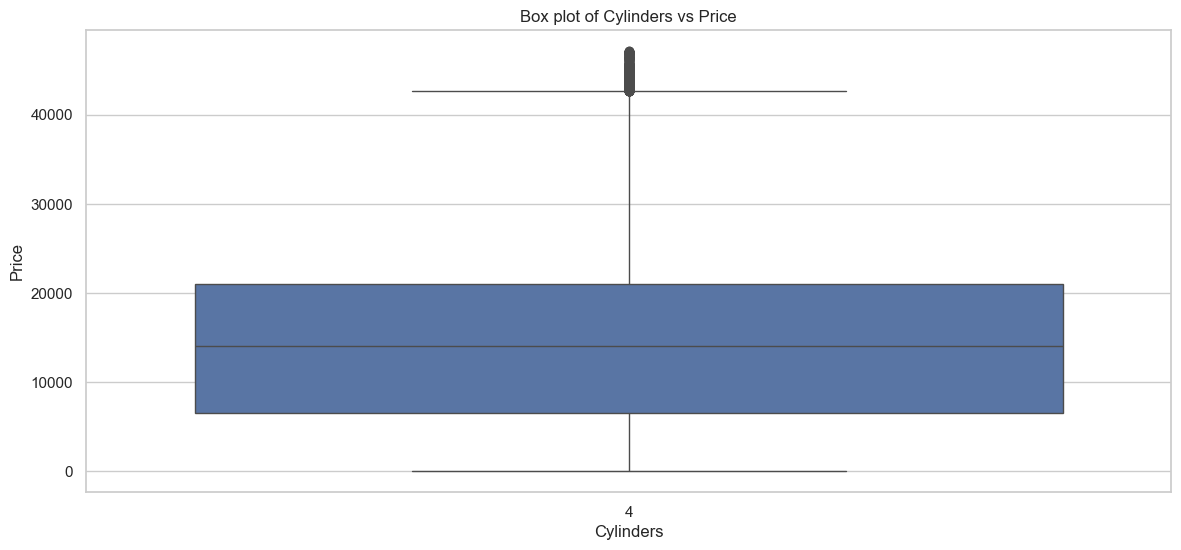

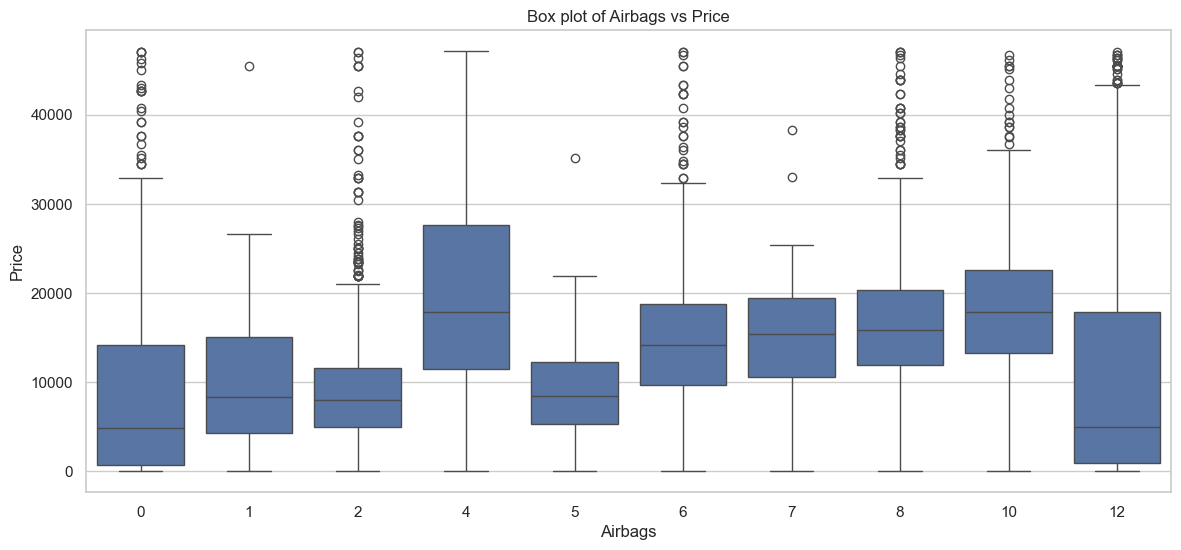

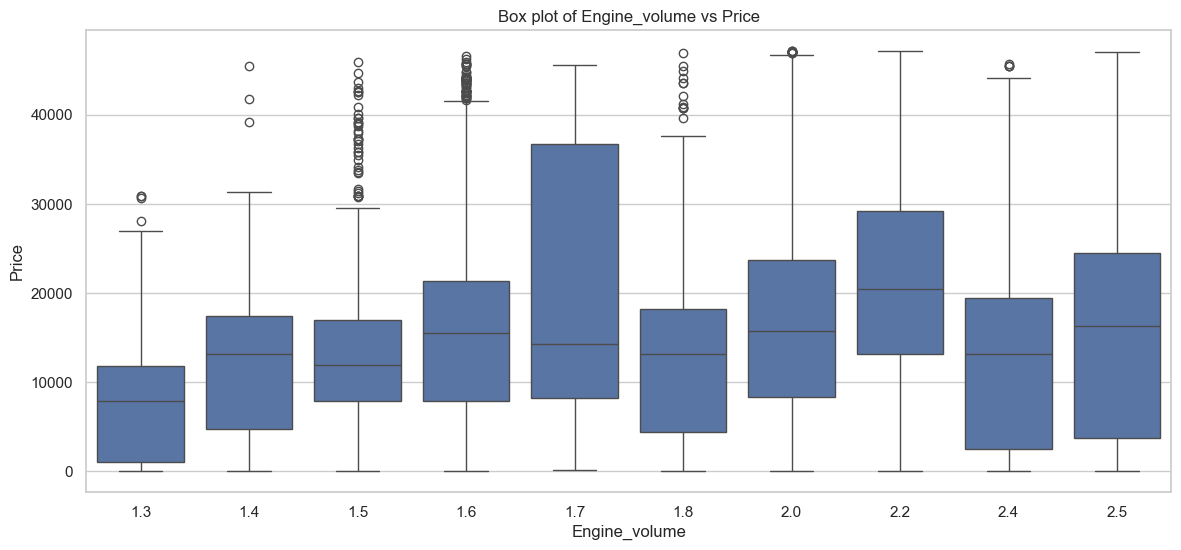

In [ ]:
for col in ['Cylinders','Airbags','Engine_volume']:
    top_10_categs = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_10_categs)]

    figure(figsize=(14,6))
    boxplot(x=filtered_df[col], y=filtered_df['Price'])
    title(f'Box plot of {col} vs Price')
    show()

------------------------------
------------------------------

## **Feature Extraction**

In [ ]:
# Date
dtime=datetime.now()
# calcul age of cars
df['Age_of_Car']=dtime.year-df['Prod_year']

In [ ]:
# df = df.drop(columns=['Prod_year'],axis=1)

In [ ]:
df[['Age_of_Car','Prod_year']]

,Age_of_Car,Prod_year
2,19,2006
3,14,2011
5,9,2016
6,15,2010
7,12,2013
...,...,...
19230,14,2011
19232,26,1999
19233,14,2011
19234,15,2010


------------------------------
------------------------------

## **Transform Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 2 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             11520 non-null  int64  
 1   Levy              11520 non-null  float64
 2   Manufacturer      11520 non-null  object 
 3   Model             11520 non-null  object 
 4   Prod_year         11520 non-null  int64  
 5   Category          11520 non-null  object 
 6   Leather_interior  11520 non-null  object 
 7   Fuel_type         11520 non-null  object 
 8   Engine_volume     11520 non-null  float64
 9   Mileage           11520 non-null  int64  
 10  Cylinders         11520 non-null  int64  
 11  Gear_box_type     11520 non-null  object 
 12  Drive_wheels      11520 non-null  object 
 13  Wheel             11520 non-null  object 
 14  Color             11520 non-null  object 
 15  Airbags           11520 non-null  int64  
 16  Age_of_Car        11520 non-null  int64  
dty

In [ ]:
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [ ]:
def number_unique_columns(data):
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

In [ ]:
number_unique_columns(df_object)

Manufacturer : 55
Model : 953
Category : 11
Leather_interior : 2
Fuel_type : 6
Gear_box_type : 4
Drive_wheels : 3
Wheel : 2
Color : 16


------------------------

In [ ]:
# for label encoding

df_object_for_LB = df_object[['Manufacturer','Model','Category','Fuel_type','Color','Leather_interior','Wheel']]

LabelEncoders = {}
for col in df_object_for_LB:
    label = LabelEncoder()
    df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
    LabelEncoders[col] = label

C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object_for_LB[col]=label.fit_transform(df_object_for_LB[col])
C:\Users\RPC\AppData\Local\Temp\ipykernel_6268\4043312042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
LabelEncoders

{'Manufacturer': LabelEncoder(),
 'Model': LabelEncoder(),
 'Category': LabelEncoder(),
 'Fuel_type': LabelEncoder(),
 'Color': LabelEncoder(),
 'Leather_interior': LabelEncoder(),
 'Wheel': LabelEncoder()}

In [ ]:
# mapping
mapping = {category : index for index, category in enumerate(LabelEncoders['Category'].classes_)}
print(mapping)

{'Cabriolet': 0, 'Coupe': 1, 'Goods wagon': 2, 'Hatchback': 3, 'Jeep': 4, 'Limousine': 5, 'Microbus': 6, 'Minivan': 7, 'Pickup': 8, 'Sedan': 9, 'Universal': 10}


In [ ]:
# Save Label encoder for using
with open('label_encoders.pkl','wb') as f :
    dump(LabelEncoders, f)

--------------------------

In [ ]:
# for one hot encoding

categorical_cols = df_object[['Gear_box_type', 'Drive_wheels']].columns

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = ohe.fit_transform(df_object[categorical_cols])
one_hot_columns = ohe.get_feature_names_out(categorical_cols)
df_ohe = DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)
df_for_ohe = df_object.drop(columns=categorical_cols).join(df_ohe)

df_for_ohe = df_for_ohe.drop(['Manufacturer','Model','Category','Fuel_type','Color','Leather_interior', 'Wheel'],axis=1)

In [ ]:
df_for_ohe.head()

,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_for_ohe.shape

(11520, 7)

In [ ]:
# save one hot encoder

with open('One_Hot_Encoder.pkl', 'wb') as f:
    dump(ohe,f)

-----------------------------

In [ ]:
df = concat([df_non_object, df_object_for_LB, df_for_ohe],axis=1)

In [ ]:
df.head()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags,Age_of_Car,Manufacturer,Model,...,Color,Leather_interior,Wheel,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,Drive_wheels_4x4,Drive_wheels_Front,Drive_wheels_Rear
2,8467,906.299205,2006,1.3,200000,4,2,19,17,412,...,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3607,862.000000,2011,2.5,168966,4,0,14,13,397,...,14,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,39493,891.000000,2016,2.0,160931,4,4,9,18,761,...,14,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761.000000,2010,1.8,258909,4,12,15,48,694,...,14,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,549,751.000000,2013,2.4,216118,4,12,12,18,782,...,7,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.shape

(11520, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 2 to 19236
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    11520 non-null  int64  
 1   Levy                     11520 non-null  float64
 2   Prod_year                11520 non-null  int64  
 3   Engine_volume            11520 non-null  float64
 4   Mileage                  11520 non-null  int64  
 5   Cylinders                11520 non-null  int64  
 6   Airbags                  11520 non-null  int64  
 7   Age_of_Car               11520 non-null  int64  
 8   Manufacturer             11520 non-null  int32  
 9   Model                    11520 non-null  int32  
 10  Category                 11520 non-null  int32  
 11  Fuel_type                11520 non-null  int32  
 12  Color                    11520 non-null  int32  
 13  Leather_interior         11520 non-null  int32  
 14  Wheel                    11

------------------------------
------------------------------

# **Model**

--------------------------

## **Spliting Data**

In [ ]:
x = df.drop('Price',axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1234)

In [ ]:
print(f'x_train : {x_train.shape}')
print(f'x_test : {x_test.shape}')
print('--------------------------')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

x_train : (9792, 21)
x_test : (1728, 21)
--------------------------
y_train : (9792,)
y_test : (1728,)


In [ ]:
x_train.columns

Index(['Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags',
       'Age_of_Car', 'Manufacturer', 'Model', 'Category', 'Fuel_type', 'Color',
       'Leather_interior', 'Wheel', 'Gear_box_type_Automatic',
       'Gear_box_type_Manual', 'Gear_box_type_Tiptronic',
       'Gear_box_type_Variator', 'Drive_wheels_4x4', 'Drive_wheels_Front',
       'Drive_wheels_Rear'],
      dtype='object')

------------------------------

## **Standard Scaling**

In [ ]:
scaler = StandardScaler()

x_train[['Levy','Engine_volume','Mileage','Age_of_Car']] = scaler.fit_transform(x_train[['Levy','Engine_volume','Mileage','Age_of_Car']])
x_test[['Levy','Engine_volume','Mileage','Age_of_Car']] = scaler.fit_transform(x_test[['Levy','Engine_volume','Mileage','Age_of_Car']])

In [ ]:
# saving scaling 
with open('scaler.pkl' , 'wb') as file :
    dump(scaler, file)

-------------------------------

## **Creating Model**

In [ ]:
r_2=[]
rmse=[]
mae=[]

def reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test,pred)
    RMSE = sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)
    
    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [ ]:
XGBRegressor_model = XGBRegressor()
RandomForestRegressor_model = RandomForestRegressor()
DecisionTreeRegressor_model = DecisionTreeRegressor()
GradientBoostingRegressor_model = GradientBoostingRegressor()

In [ ]:
reg(XGBRegressor_model)
reg(RandomForestRegressor_model)
reg(DecisionTreeRegressor_model)
reg(GradientBoostingRegressor_model)

In [ ]:
Algorithms = ['RandomForestRegressor','XGBRegressor','DecisionTreeRegressor','GradientBoostingRegressor']

In [ ]:
result=DataFrame({'Algorithms':Algorithms,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,R2,rmse,mae
0,RandomForestRegressor,0.780724,5288.389925,3628.887207
1,XGBRegressor,0.809248,4932.451728,3203.261752
2,DecisionTreeRegressor,0.620554,6956.692342,4194.283943
3,GradientBoostingRegressor,0.709763,6084.208815,4422.189539


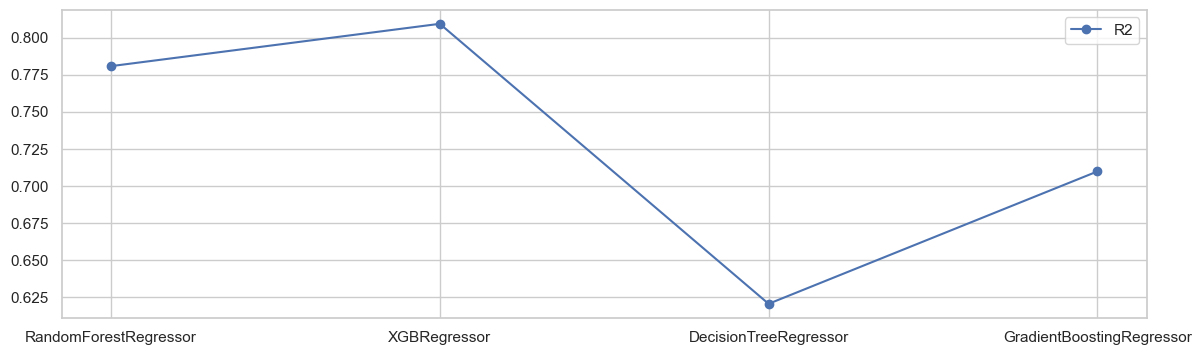

In [ ]:
fig,sx = subplots(figsize=(14,4))
plot(result.Algorithms,result.R2,label='R2',c='b',marker='o')
legend()
show()

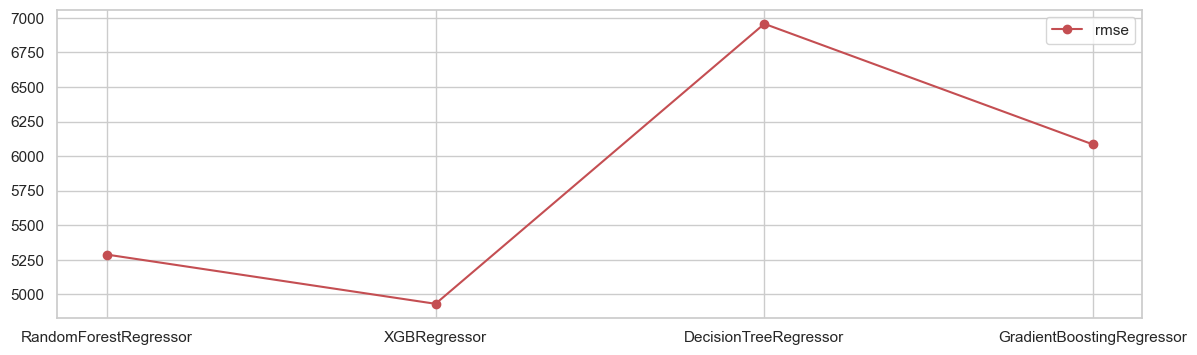

In [ ]:
fig,sx = subplots(figsize=(14,4))
plot(result.Algorithms,result.rmse,label='rmse',c='r',marker='o')
legend()
show()

In [ ]:
# saving model
with open('XGBRegressor_model.pkl' , 'wb') as file3 :
    dump(XGBRegressor_model, file3)

In [ ]:
# saving model
with open('RandomForestRegressor_model.pkl' , 'wb') as file3 :
    dump(RandomForestRegressor_model, file3)